# Load and Calculations

In [ ]:
import pickle
import numpy as np
from multiprocessing import Pool
import requests, json
import pandas as pd
import glob
import time
from multiprocessing import Pool
import numpy as np
from scipy import stats

def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
from zipfile import ZipFile
import re
import xmlschema
from pprint import pprint
import glob
# importing element tree
import lxml.etree as etree
import pickle

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=ff-4)
    plt.yticks(fontsize=ff-4)

import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as mtransforms
sns.set_theme(style='white')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
sns.set_context('talk', font_scale=.65)
mpl.rcParams.update({'text.usetex': False})

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

- ensured no preprints in data : ARXIV, BIOARXIV, MEDARXIV 


In [ ]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
significant_cores3={}
PAPERS_TOGETHER=3

for gsize in range(2,10):
    print(gsize,end='\r')
    with open(path_career+'significant_cores3_size'+str(gsize)+'(whole).pkl', 'rb') as f:
        significant_cores3[gsize]=pickle.load(f) 
        significant_cores3[gsize]=significant_cores3[gsize][significant_cores3[gsize]['w']>PAPERS_TOGETHER]
    significant_cores3[gsize]['size']=gsize

### Publication year by Team

In [ ]:
t_ic = time.time();
maxS=8
first_={}
last_={}
for gsize in range(2,10):
    print(gsize,end='\r')
    first_[gsize]=[]
    last_[gsize]=[]
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        papers_by_team=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
              
    for n in range(len(I)-1):        
        a=pub_years[I[n]:I[n+1]]
        first_[gsize].append(a[0])
        last_[gsize].append(a[len(a)-1])
#         b=pub_years[I[n]:I[n+1]]

#-----------------------------
for gsize in range(2,10):
    print(gsize,end='\r')
    significant_cores3[gsize]['first_paper_pubyear']=first_[gsize]
    significant_cores3[gsize]['last_paper_pubyear']=last_[gsize]

    
    with open(path_career+'dict_first_paper_pubyear'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(first_[gsize], f) 
    with open(path_career+'dict_last_paper_pubyear'+str(gsize)+'.pkl', 'wb') as f:
        pickle.dump(last_[gsize], f) 
#-----------------------------
# for gsize in range(2,10):
    
#     with open(path_career+'dict_first_paper_pubyear'+str(gsize)+'.pkl', 'rb') as f:
#         x=pickle.load(f)
#     significant_cores3[gsize]['first_paper_pubyear']=x
#     with open(path_career+'dict_last_paper_pubyear'+str(gsize)+'.pkl', 'rb') as f:
#         y=pickle.load(f)
#     significant_cores3[gsize]['last_paper_pubyear']=y

#-----------------------------

### fraction of one shot teams (3)

In [ ]:
for gsize in range(2,maxS):
    print(gsize,end='\r')
    team_first_time=list(significant_cores3[gsize]['first_paper_pubyear'])

    with open(path_career+'sfirstpubtogether'+str(gsize)+'.pkl', 'rb') as f:
        sfirstpubtogether=pickle.load(f) 
#     is_formed_in_one_shot=np.array([round(np.min(sfirstpubtogether[it]),0)==round(team_first_time[it],0) for it in range(len(team_first_time))])
    is_formed_in_one_shot=np.array([len(np.unique(sfirstpubtogether[it]))==1 for it in range(len(sfirstpubtogether))])
    significant_cores3[gsize]['is_formed_in_one_shot']=(is_formed_in_one_shot==True)

### dict_pairs_firstpubtogether

In [ ]:
# with open(path_career+'dict_firstpub.pkl', 'rb') as f:
#     dict_firstpub=pickle.load(f) 
# auth_to_firstpubyear=dict_firstpub

# with open(path_career+'dict_pubdate.pkl', 'rb') as f:
#     dict_pubdate=pickle.load(f) 
# paper_to_pubyear=dict_pubdate

### set c5

 - remove papers with pub_year>2018 
 (2023 - 5= 2018)

In [ ]:

for gsize in range(2,maxS):
    print(gsize,end='\r')

#     with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         c5=pickle.load(f) 
#     with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
#         I=pickle.load(f) 
    with open(path_career+'significant_cores(w2018)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['https://docs.google.com/spreadsheets/d/1acXm1cho9grOSEz2Udk2AQaC4yPIiKDBsc9fKi-Ke0c/edit#gid=1281969688'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_mean)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_av'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_half1)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_half1'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_half2)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_half2'] =pickle.load(f) 
    with open(path_career+'significant_cores(c5_first)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        significant_cores3[gsize]['c5_first'] =pickle.load(f) 

### set exclusivity

In [ ]:
with open(path_career+'work_counts_UNION.pkl', 'rb') as f:
        work_counts_UNION=pickle.load(f) 
for  gsize in range(2,maxS):
    significant_cores3[gsize]['work_counts_UNION']=work_counts_UNION[gsize]
    significant_cores3[gsize]['exclusivity']=np.divide(significant_cores3[gsize]['w'],significant_cores3[gsize]['work_counts_UNION'])


### set core synergistic concept diversity : 1- cosine similarity 

In [ ]:
with open(path_career+'dict_core_cosine_diversity.pkl', 'rb') as f:
    dict_core_cosine_diversity=pickle.load(f) 
for gsize in range(2,maxS):
    significant_cores3[gsize]['synergisticcorediversity']=dict_core_cosine_diversity[gsize]


### set concept monodisciplinarity / knowledge broadness
max(all disci scores )/sum(all disci scores) 

In [ ]:
with open(path_career+'dict_monodisciplinarity.pkl', 'rb') as f:
    dict_monodisciplinarity=pickle.load(f) 
with open(path_career+'dict_knowledgebroadness.pkl', 'rb') as f:
    dict_knowledgebroadness=pickle.load(f) 

for gsize in range(2,maxS):
    significant_cores3[gsize]['monodisciplinarity']=dict_monodisciplinarity[gsize]
    significant_cores3[gsize]['knowledgebroadness']=dict_knowledgebroadness[gsize]


### set core geo diversity : rao stirling diversity

In [ ]:
with open(path_career+'geodiversities_countries.pkl', 'rb') as f:
    geodiversities_countries=pickle.load(f) 
with open(path_career+'geodiversities_continents.pkl', 'rb') as f:
    geodiversities_continents=pickle.load(f) 
for gsize in range(2,maxS):
    significant_cores3[gsize]['geodiversities_countries']=geodiversities_countries[gsize]
    significant_cores3[gsize]['geodiversities_continents']=geodiversities_continents[gsize]


In [ ]:
with open(path_career+'unidiversities.pkl', 'rb') as f:
    unidiversities=pickle.load(f) 
for gsize in range(2,maxS):
    significant_cores3[gsize]['unidiversities']=unidiversities[gsize]


### set persistence time of core

In [ ]:
for gsize in range(2,maxS):
    significant_cores3[gsize]['persistance_time']=significant_cores3[gsize]['last_paper_pubyear']-significant_cores3[gsize]['first_paper_pubyear']


### set ages categories and proportions of age classes in data

In [ ]:
ageatformation={}

young_age=7
emerging_age=14
maxage=70
for gsize in range(2,maxS):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(ages)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        ages=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pub_years=pickle.load(f) 
    x =[]
    for n in range(len(I)-1):
        x.append(ages[I[n]])
    ageatformation[gsize]=np.array(x)

In [ ]:
age_proportions_in_data ={}
for gsize in range(2,maxS):
    count_young=np.sum(ageatformation[gsize]<=young_age,axis=1)
    count_midage=np.sum((ageatformation[gsize]>young_age)&(ageatformation[gsize]<=emerging_age),axis=1)
    count_oldage=np.sum((ageatformation[gsize]>emerging_age)&(ageatformation[gsize]<=maxage),axis=1)
    totsci=np.sum(count_young)+np.sum(count_midage)+np.sum(count_oldage)
    age_proportions_in_data[gsize]={"young": np.sum(count_young)/totsci, "midage": np.sum(count_midage)/totsci, "oldage": np.sum(count_oldage)/totsci}

In [ ]:
for gsize in range(2,maxS):
    significant_cores3[gsize]['frac_young']=np.sum(ageatformation[gsize]<=young_age,axis=1)/gsize
    significant_cores3[gsize]['frac_midage']=np.sum((ageatformation[gsize]>young_age)&(ageatformation[gsize]<=emerging_age),axis=1)/gsize
    significant_cores3[gsize]['frac_oldage']=np.sum((ageatformation[gsize]>emerging_age)&(ageatformation[gsize]<=maxage),axis=1)/gsize

### set max age gap in core and standard deviation


In [ ]:
MAX_AGE=maxage


for gsize in range(2,maxS):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(ages)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        ages=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
#     with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
#         pub_years=pickle.load(f) 
    ages_=np.array(ages[I[0:-1]])
    ages_=ages_[ages_<MAX_AGE]
    ages_=ages_[ages_>=0]
    AgeDev=np.nanstd(ages_)
    MaxAgeGap=np.nanmax(ages_)-np.nanmin(ages_)
    MeanAge=np.nanmean(ages_)-np.nanmin(ages_)

    significant_cores3[gsize]['AgeDev']=AgeDev
    significant_cores3[gsize]['MaxAgeGap']=MaxAgeGap
    significant_cores3[gsize]['MeanAge']=MeanAge

In [ ]:
# significant_cores3[2]

### set non-core ages

In [ ]:


for gsize in range(2,maxS):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(agesnoncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        ages_noncore=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 

    frac_young=[];frac_midage=[];frac_oldage=[];
    for n in range(len(I)-1):
        x=np.concatenate(ages_noncore[I[n]:I[n+1]])
        x=x[x<MAX_AGE]
        x=x[x>=0] 
        if gsize==len(x):
            frac_young.append(np.sum(x<=young_age)/(len(x)))
            frac_midage.append(np.sum((x>young_age)&(x<=emerging_age))/(len(x)))
            frac_oldage.append(np.sum(x>emerging_age)/(len(x)))
        else:
            frac_young.append(np.nan)
            frac_midage.append(np.nan)
            frac_oldage.append(np.nan)
            
        if (n+1)%100==0:
            t_oc = time.time();
            frac=n/len(I)
            prog='gs '+str(gsize)+','+str(frac)+str(round(t_oc-t_ic,2))+', time estimate: '+str(round((t_oc-t_ic)/frac/3600,2))
            print(prog,end='\r') 
    significant_cores3[gsize]['noncore_frac_young']=frac_young
    significant_cores3[gsize]['noncore_frac_midage']=frac_midage
    significant_cores3[gsize]['noncore_frac_oldage']=frac_oldage

### set literature search quants

In [ ]:
corelitD={};corelitB={};corelitP={};
for gsize in range(2,maxS):
    with open(path_career+'significant_cores(litBreadth)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        litBreadth=pickle.load(f)
    with open(path_career+'significant_cores(litDepth)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        litDepth=pickle.load(f) 
    with open(path_career+'significant_cores(pub_years)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        pubyears =pickle.load(f) 
    litDepth=pubyears-litDepth
    with open(path_career+'significant_cores(litPopularity)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        litPopularity=pickle.load(f) 


    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    print(gsize,end='\r')
    corelitD[gsize]=[np.nanmean(litDepth[I[n]:I[n+1]]) for n in range(len(I)-1)]
    corelitB[gsize]=[np.nanmean(litBreadth[I[n]:I[n+1]]) for n in range(len(I)-1)]
    corelitP[gsize]=[np.nanmean(litPopularity[I[n]:I[n+1]]) for n in range(len(I)-1)]

    significant_cores3[gsize]['corelitP']=corelitP[gsize]
    significant_cores3[gsize]['corelitD']=corelitD[gsize]
    significant_cores3[gsize]['corelitB']=corelitB[gsize]

# 1. Number of cores per author

In [ ]:
with open(path_career+'dictauthcores.pkl', 'rb') as f:
    dictauthcores=pickle.load(f) 
num_cores=np.array([len(dictauthcores[x]) for x in dictauthcores.keys()])
with open(path_career+'dict_auth_to_paper(whole).pkl', 'rb') as f:
    dict_auth_to_paper=pickle.load(f) 

In [ ]:
from collections import Counter
import collections
X=collections.OrderedDict(sorted(Counter(num_cores).items()))
Y=[X[x]/sum(X.values()) for x in X.keys()]
Y0=1-len(dictauthcores)/len(dict_auth_to_paper)
data=[Y0]+([x*(1-Y0) for x in Y[0:4]])

data.append(1-np.sum(data[0:5]))
labels = [x for x in range(len(data)-1)]
labels.append('more than\n'+str(len(data)-2)+' cores')
labels[0]='no cores'
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]



label_ff = 20;ff = 20;aa=4;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])


#create pie chart
colors=['#edf8fb','#bfd3e6','#9ebcda','#8c96c6','#8856a7','#810f7c']
ax=plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%' ,textprops={'fontsize': 8},explode=[.05 for x in range(len(data))])
plt.title('number of cores per scientist');
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_CoresPerScientist.pdf',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_CoresPerScientist.png',dpi=300, bbox_inches = "tight")


Among the population, 42% of scientists are part of atleast one core while its rare to have more than 3 cores.

In [ ]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_authage2023.pkl', 'rb') as f:
    dict_authage2023=pickle.load(f) #author age in 2023
    


path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_workcounts.pkl', 'rb') as f:
    dict_workcounts=pickle.load(f) #author age in 2023

### - who are these scientists with no cores?


- Number of papers of scientists with no cores

In [ ]:
label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
nb=30
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
authzerocores=[auth for auth in dict_auth_to_paper.keys() if auth not in dictauthcores.keys()];
X=np.array([dict_workcounts[x] for x in authzerocores]);X=X[X<200];X=X[X>19]

plt.hist(X,bins=nb,density=True,alpha=.4,label='authors with no cores')

Y=np.array([dict_workcounts[x] for x in dictauthcores.keys()]);Y=Y[Y<200];Y=Y[Y>19]
plt.hist(Y,bins=nb,density=True,alpha=.4,label='authors with cores')
plt.legend(frameon=False,loc='upper right')
sns.despine(ax=ax)
plt.xlabel('number of publications, n')
plt.ylabel('pdf(n)')

print(np.mean(X),np.mean(Y))
# plt.savefig('teamsfig1.1.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig1.1.pdf',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig1.1.png',dpi=300, bbox_inches = "tight")


# FIGURE 1----------------


# 2. Distribution of coresizes, Time taken to form persistent team 

from the time of first pairwise meeting of any members

In [236]:
for gsize in range(2,maxS):
    print(gsize,end='\r')
    team_first_time=list(significant_cores3[gsize]['first_paper_pubyear'])

    with open(path_career+'sfirstpubtogether'+str(gsize)+'.pkl', 'rb') as f:
        sfirstpubtogether=pickle.load(f) 
    significant_cores3[gsize]['time_taken_to_accumulatev2']=-np.array([(np.min(np.array(sfirstpubtogether[it]))-team_first_time[it]) for it in range(len(team_first_time))])
    
t=[]
for gsize in range(3,maxS):
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
    A=A[A['is_formed_in_one_shot']==False]
    print(gsize,'----Time taken to form persistent team= ',np.mean(A['time_taken_to_accumulatev2']))
    t.append(np.mean(A['time_taken_to_accumulatev2']))
print('FROM THE TIME OF FIRST JOINT PUBLICATION BY ANY PAIR OF MEMBERS')

3 ----Time taken to form persistent team=  5.4178898685571415
4 ----Time taken to form persistent team=  7.6131872209455596
5 ----Time taken to form persistent team=  9.305077225130894
6 ----Time taken to form persistent team=  10.475015790984786
7 ----Time taken to form persistent team=  11.509922152417376
FROM THE TIME OF FIRST JOINT PUBLICATION BY ANY PAIR OF MEMBERS


<ipython-input-237-9b9aa17a51f8>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/mnt/sdb1/sandeep/.local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2287: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/mnt/sdb1/sandeep/.local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2287: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/mnt/sdb1/sandeep/.local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2287: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/mnt/sdb1/sandeep/.local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2287: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/mnt/sdb1/sandeep/.local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2287: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/mnt/sdb1/sandeep/.local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2287: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
<ipy

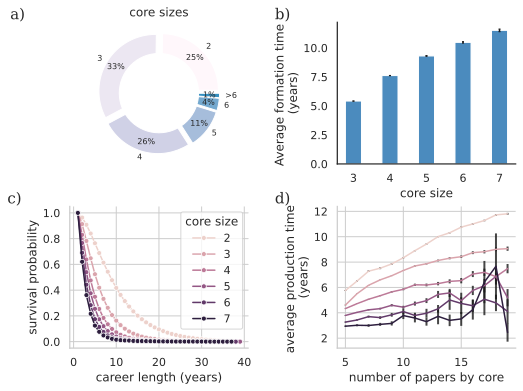

In [237]:
label_ff = 15;ff = 20;aa=8;bb=6;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=2, nrows=2,width_ratios=[1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])
ax = fig.add_subplot(spec[0])


HH=8
X=[significant_cores3[gsize].shape[0] for gsize in range(2,HH)]
Y=[x/sum(X) for x in X]
Y
labels = [x for x in range(2,HH-1)]
labels.append('>'+str(HH-2))
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]


#create pie chart
# labels=['dyads','triads','quartets','quintets','teams of ']
colors=['#fff7fb','#ece7f2','#d0d1e6','#a6bddb','#74a9cf','#3690c0','#0570b0','#045a8d','#023858']
plt.pie(Y, labels = labels, colors = colors, autopct='%.0f%%',pctdistance=0.82 ,textprops={'fontsize': 8},explode=[.07 for x in range(len(Y))])

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('core sizes');


plt.tight_layout()
ax.text(-0.55, 1.0, 'a)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
#________________________________________________________________________________________
sns.set(style="white")

ax = fig.add_subplot(spec[1])

dfplot = pd.DataFrame()
x=[];y_err=[]
for gsize in range(3,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
    A=A[A['is_formed_in_one_shot']==False]    
    x.append(np.mean(A['time_taken_to_accumulatev2']))
    y_err.append(stats.sem(A['time_taken_to_accumulatev2']))  # Calculate standard deviation
dfplot['gsize']=[gsize for gsize in range(3,maxS)]
dfplot['Average formation time (years)']=x

ax.bar(dfplot['gsize'], dfplot['Average formation time (years)'],width=.44, color='#4B8BBE', yerr=y_err, capsize=1)
plt.xlabel('core size');plt.ylabel('Average formation time \n(years)');
sns.despine()  # Removing the top and right spines
sns.set_style('whitegrid')  # Set the style to 'whitegrid'
ax.text(-0.35, 1.0, 'b)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')


#________________________________________________________________________________________
ax = fig.add_subplot(spec[2])
from scipy import stats
from lifelines import KaplanMeierFitter
dict_career_lengths={}
for gsize in range(2,maxS):
    A=significant_cores3[gsize]
    A['career_length']=A['last_paper_pubyear']-A['first_paper_pubyear']
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
    A=A[A['career_length']<40]
    A=A[A['career_length']>0]
    dict_career_lengths[gsize]=list(A['career_length'])


# Create a DataFrame for plotting
combined_data = pd.DataFrame()

# Iterate through the dictionary and calculate survival probabilities for each group
for key, career_lengths in dict_career_lengths.items():
    max_career_length = int(max(career_lengths))
    survival_probabilities = []

    for year in range(1, (max_career_length) + 1):
        survival_probability = len([length for length in career_lengths if length >= year]) / len(career_lengths)
        survival_probabilities.append(survival_probability)

    # Append to the combined DataFrame
    temp_df = pd.DataFrame({'Year': range(1, max_career_length + 1), 'Survival_Probability': survival_probabilities, 'core size': key})
    combined_data = pd.concat([combined_data, temp_df])

# Plotting
ax=sns.lineplot(x='Year', y='Survival_Probability', hue='core size', data=combined_data, marker='o',markersize=5)
# plt.title('Survival Curves for Different Groups of Scientists')
plt.xlabel('career length (years)')
plt.ylabel('survival probability')
sns.despine(ax=ax)
ax.text(-0.35, 1.0, 'c)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')

#________________________________________________________________________________________
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    for W in range(5,20):
        A=significant_cores3[gsize]
    
        A=A[A['w']==W]
        x=pd.DataFrame()
        x['time taken to produce (years)']=list(A[(A['persistance_time']>1) &(A['persistance_time']<30)]['persistance_time'])
        x['core size']=gsize
        x['number of papers by core']=W
        dfplot=pd.concat([dfplot,x])
ax = fig.add_subplot(spec[3])
grouped = dfplot.groupby(['core size', 'number of papers by core'])['time taken to produce (years)']
summary = grouped.agg(mean='mean', sem=lambda x: stats.sem(x, ddof=1)).reset_index()

# Calculate the 95% confidence intervals
summary['ci_95'] = summary['sem'] * stats.t.ppf((1 + 0.95) / 2., grouped.count() - 1)
# ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size', style='core size', markers=True, err_style='bars', ci='sd')
ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size',  err_style='bars')
x=list(summary['number of papers by core']);
y=list(summary['mean']);y_err=summary['sem'];
alpha=.8;ini_=0;lw=2;ms=2
# ax.errorbar(x,y,y_err ,fmt='', mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='#beaed4',ecolor='#beaed4',alpha=alpha,label=r'NSF winners')

ax.errorbar(x,y,y_err ,fmt='none', mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='k',ecolor='k',alpha=alpha,label=r'NSF winners')

# ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size', err_style="bars", errorbar=("sem", 2))
sns.despine(ax=ax)

plt.xlabel('number of papers by core')
plt.ylabel('average production time \n(years)')
ax.text(-0.35, 1.0, 'd)', transform=ax.transAxes,fontsize=label_ff, va='bottom', fontfamily='serif')
plt.legend([],[], frameon=False)



#________________________________________________________________________________________
sns.set_style('white')  # Set the style to 'whitegrid'

plt.tight_layout()
plt.savefig('TeamsFig1.svg',dpi=300, bbox_inches = "tight")
plt.savefig('TeamsFig1.png',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_FormationTime.png',dpi=300, bbox_inches = "tight")

# FIGURE 2-----------------------

### caculations

In [158]:
import numpy as np
from scipy.special import comb
from itertools import combinations_with_replacement, product
from math import prod

def calculate_team_compositions(N, proportions, team_size):
    categories = list(proportions.keys())
    num_categories = {category: int(round(prop * N)) for category, prop in proportions.items()}

    def calculate_probability(composition):
        counts = {category: composition.count(category) for category in categories}
        return comb(N, team_size) ** -1 * prod(comb(num_categories[category], count) for category, count in counts.items())

    probabilities = {}
    for composition in combinations_with_replacement(categories, team_size):
        key = '_'.join(sorted(composition))
        probabilities[key] = probabilities.get(key, 0) + calculate_probability(composition)

    return probabilities



# Add this function to group the probabilities
def group_probabilities(team_compositions):
    groupings = {
        "only_young": lambda k: all(c == "young" for c in k),
        "only_midage": lambda k: all(c == "midage" for c in k),
        "only_oldage": lambda k: all(c == "oldage" for c in k),
        "mixed_young_midage": lambda k: "young" in k and "midage" in k and "oldage" not in k,
        "mixed_young_oldage": lambda k: "young" in k and "oldage" in k and "midage" not in k,
        "mixed_midage_oldage": lambda k: "midage" in k and "oldage" in k and "young" not in k,
        "mixed_all": lambda k: "young" in k and "midage" in k and "oldage" in k
    }

    grouped_probabilities = {key: sum(prob for comp, prob in team_compositions.items() if func(comp.split('_')))
                             for key, func in groupings.items()}
    return grouped_probabilities


def simulate_team_compositions(proportions, team_size, trials):
    categories = list(proportions.keys())
    results = {category: [] for category in ["only_young", "only_midage", "only_oldage", 
                                             "mixed_young_midage", "mixed_young_oldage", 
                                             "mixed_midage_oldage", "mixed_all"]}

    for _ in range(trials):
        team = np.random.choice(categories, size=team_size, p=list(proportions.values()))
        counts = {category: team.tolist().count(category) for category in categories}
        
        results["only_young"].append(counts["young"] == team_size)
        results["only_midage"].append(counts["midage"] == team_size)
        results["only_oldage"].append(counts["oldage"] == team_size)
        results["mixed_young_midage"].append(counts["young"] > 0 and counts["midage"] > 0 and counts["oldage"] == 0)
        results["mixed_young_oldage"].append(counts["young"] > 0 and counts["oldage"] > 0 and counts["midage"] == 0)
        results["mixed_midage_oldage"].append(counts["midage"] > 0 and counts["oldage"] > 0 and counts["young"] == 0)
        results["mixed_all"].append(all(counts[category] > 0 for category in categories))

    means = {key: np.mean(values) for key, values in results.items()}
    std_devs = {key: np.std(values) for key, values in results.items()}
    
    return means, std_devs
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._setlabels(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])
        
    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)
        ax.set_xlabel('knowledge broadness')
        ax.set_ylabel('synergistic diversity')
    def _setlabels(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)
#         ax.set_xlabel('knowledge broadness')
#         ax.set_ylabel('synergistic diversity')
        ax.set_ylim([-.02,1])
        ax.set_yticks([0,.5,1])
        
    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

        


# Example usage




data = {
    "Team Size": [],  # This would be the range of team sizes you have
    "only_young": [],  # Percentages for each team size
    "only_midage": [],
    "only_oldage": [],
    "mixed_young_midage": [],
    "mixed_young_oldage": [],
    "mixed_midage_oldage": [],
    "mixed_all": []
}
for gsize in range(2,maxSS):
    A=significant_cores3[gsize]
    A=A.dropna()

    import pandas as pd

    # Assuming A is your DataFrame and it has columns 'frac_young', 'frac_midage', 'frac_oldage'

    # Define the mutually exclusive categories
    only_young = (A['frac_young'] == 1) & (A['frac_midage'] == 0) & (A['frac_oldage'] == 0)
    only_midage = (A['frac_young'] == 0) & (A['frac_midage'] == 1) & (A['frac_oldage'] == 0)
    only_oldage = (A['frac_young'] == 0) & (A['frac_midage'] == 0) & (A['frac_oldage'] == 1)
    mixed_young_midage = (A['frac_young'] > 0) & (A['frac_midage'] > 0) & (A['frac_oldage'] == 0)
    mixed_young_oldage = (A['frac_young'] > 0) & (A['frac_midage'] == 0) & (A['frac_oldage'] > 0)
    mixed_midage_oldage = (A['frac_young'] == 0) & (A['frac_midage'] > 0) & (A['frac_oldage'] > 0)
    mixed_all = (A['frac_young'] > 0) & (A['frac_midage'] > 0) & (A['frac_oldage'] > 0)
    total_teams=only_young.sum()+only_midage.sum()+only_oldage.sum()+mixed_young_midage.sum()+mixed_midage_oldage.sum()+mixed_young_oldage.sum()+mixed_all.sum()
    # Calculate the percentage for each category
     
#     total_teams = A.shape[0]
    percent_only_young = only_young.sum() / total_teams * 100
    percent_only_midage = only_midage.sum() / total_teams * 100
    percent_only_oldage = only_oldage.sum() / total_teams * 100
    percent_mixed_young_midage = mixed_young_midage.sum() / total_teams * 100
    percent_mixed_young_oldage = mixed_young_oldage.sum() / total_teams * 100
    percent_mixed_midage_oldage = mixed_midage_oldage.sum() / total_teams * 100
    percent_mixed_all = mixed_all.sum() / total_teams * 100
    
    data["Team Size"].append(gsize)
    data["only_young"].append(percent_only_young)
    data["only_midage"].append(percent_only_midage)
    data["only_oldage"].append(percent_only_oldage)
    data["mixed_young_midage"].append(percent_mixed_young_midage)
    data["mixed_young_oldage"].append(percent_mixed_young_oldage)
    data["mixed_midage_oldage"].append(percent_mixed_midage_oldage)
    data["mixed_all"].append(percent_mixed_all)
agegroups_within_core = pd.DataFrame(data)

data_null = {
    "Team Size": [],  # This would be the range of team sizes you have
    "only_young": [],  # Percentages for each team size
    "only_midage": [],
    "only_oldage": [],
    "mixed_young_midage": [],
    "mixed_young_oldage": [],
    "mixed_midage_oldage": [],
    "mixed_all": []
}
# Example usage
for gsize in range(2,maxSS):
    N = significant_cores3[gsize].shape[0]
    proportions=age_proportions_in_data[gsize]
    team_size = gsize
    team_compositions = calculate_team_compositions(N, proportions, team_size)
    grouped_probs = group_probabilities(team_compositions)
    data_null["Team Size"].append(gsize)
    for k in grouped_probs.keys():
        data_null[k].append(grouped_probs[k]*100) 
    
agegroups_within_core_null = pd.DataFrame(data_null)


## Plot


In [ ]:
maxSS=6

In [239]:
# label_ff = 20;ff = 20;aa=6;bb=4;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=2, nrows=2,width_ratios=[1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])
# ax = fig.add_subplot(spec[0])
# sns.set_style('white')  # Set the style to 'whitegrid'
# dfplot=pd.DataFrame()

# for gsize in range(2,maxSS):
#     icd=np.where(significant_cores3[gsize].columns=='synergisticcorediversity')[0][0]
#     isize=np.where(significant_cores3[gsize].columns=='size')[0][0]
#     print(gsize,end='\r')
#     A=pd.DataFrame(np.concatenate(ageatformation[gsize]))
#     A.columns=['age']
#     A=A[A['age']>=0]
#     A=A[A['age']<=maxage]
# #     A=A[A['persistance_time']>=1]       
# #     A=A.iloc[:,[isize,icd]]
    
# #     dfplot=pd.concat([dfplot ,A])
#     ax=sns.kdeplot(data=A.dropna(),clip=[0,maxage], x="age",label=''+str(gsize),linewidth=1);
#     # ax=sns.violinplo|t(data=dfplot.dropna(), x="core_diversity",y='size');
# # ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);

# sns.despine(ax=ax)
# plt.tight_layout()
# plt.legend();


# #________________________________________________________
# ax = fig.add_subplot(spec[1])
# dict_geo={'university':{},'country':{},'continent':{}}
# for gsize in range(2,maxSS):
#     icd=np.where(significant_cores3[gsize].columns=='geodiversities_countries')[0][0]
#     isize=np.where(significant_cores3[gsize].columns=='size')[0][0]

#     print(gsize,end='\r')
#     A=significant_cores3[gsize]
#     A=A[A['w']>=5]
#     A=A[A['persistance_time']>=1]       
#     A=A.dropna()
#     dict_geo['university'][gsize]=100*A[A['unidiversities']==0].shape[0]/A.shape[0]
#     dict_geo['country'][gsize]=100*(A[A['geodiversities_countries']==0].shape[0]/A.shape[0])
#     dict_geo['continent'][gsize]=100*(A[A['geodiversities_continents']==0].shape[0]/A.shape[0])
#     A=A.iloc[:,[isize,icd]]
#     dfplot=pd.concat([dfplot ,A])
# #     ax=sns.kdeplot(data=A.dropna(), x="geodiversities_countries",label='coresize='+str(gsize));
# # ax=sns.histplot(data=dfplot.dropna(), x="geodiversities_countries",bins=20,alpha=.6,stat = "probability");
# # ax=sns.violinplo|t(data=dfplot.dropna(), x="core_diversity",y='size');

# df = pd.DataFrame(dict_geo)
# df.reset_index(inplace=True)
# df.rename(columns={'index': 'x_values'}, inplace=True)

# # Plotting
# sns.set(style="white")
# # plt.figure(figsize=(10, 6))

# # Plot each curve
# markers=['s','.','o']
# for column in df.columns[1:]:
#     ax=sns.lineplot(x='x_values', y=column,data=df,marker='o',label=column,markers=True,dashes=False)

# # Labeling
# plt.xlabel('core size')
# plt.ylabel('% co-located cores')
# plt.legend()

# # ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);

# sns.despine(ax=ax)
# plt.tight_layout()
# #_____________________________________________________________


# # Plotting
# custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
# ax = fig.add_subplot(spec[2])

# long_df = agegroups_within_core.melt(id_vars='Team Size', var_name='Category', value_name='Value')
# long_dfnull = agegroups_within_core_null.melt(id_vars='Team Size', var_name='Category', value_name='Value')

# # Initialize the bottom array to zero
# bottom = [0] * len(agegroups_within_core)
# bottom2 = [0] * len(agegroups_within_core_null)

# # Plotting
# categories = agegroups_within_core.columns[1:]  # Exclude 'Team Size'

# for idx, category in enumerate(categories):
#     # Filter data for this category
#     cat_data = long_df[long_df['Category'] == category]
#     cat_datanull = long_dfnull[long_dfnull['Category'] == category]

#     # Plot
#     ax.bar(cat_data['Team Size']-.2*np.ones((4,)), cat_data['Value'], label=category,
#            bottom=bottom, color=custom_palette[idx]
#         , alpha=1)
#     # Update the bottom positions
#     bottom += cat_data['Value'].values

#     ax.bar(cat_datanull['Team Size']+.2*np.ones((4,)), cat_datanull['Value'],
#            bottom=bottom2, color=custom_palette[idx]
#         , alpha=.4)
#     # Update the bottom positions
#     bottom2 += cat_datanull['Value'].values


# change_width(ax, .35)


# # plt.xlabel("core size")
# # plt.ylabel("Percentage")
# # plt.title("data")
# plt.legend( title="Age Groups",loc='upper left', bbox_to_anchor=(1, 1),fontsize=ff-12,ncol=1)
# sns.despine(ax=ax)
# plt.xlabel("core size")
# plt.ylabel("Percentage");


<ipython-input-344-377eb78c01f5>:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<ipython-input-344-377eb78c01f5>:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<ipython-input-344-377eb78c01f5>:157: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar()


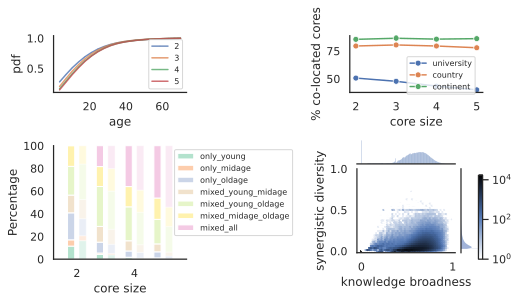

In [344]:

def plotCDFax(ax,data,label):
    count, bins_count = np.histogram(data, bins=20)
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)
    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    # plotting PDF and CDF
#     plt.plot(bins_count[1:], pdf, color="red", label="PDF")
    ax=plt.plot(bins_count[1:], cdf,'.-', label=label,alpha=.8,markersize=.1);

    
    
    

label_ff = 20;ff = 20;aa=7;bb=4;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));


spec = gridspec.GridSpec(ncols=2, nrows=2,width_ratios=[1,1], wspace=wspace_,hspace=hspace_, height_ratios=[.5,1])
ax = fig.add_subplot(spec[0])
sns.set_style('white')  # Set the style to 'whitegrid'
dfplot=pd.DataFrame()

for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='synergisticcorediversity')[0][0]
    isize=np.where(significant_cores3[gsize].columns=='size')[0][0]
    print(gsize,end='\r')
    A=pd.DataFrame(np.concatenate(ageatformation[gsize]))
    A.columns=['age']
    A=A[A['age']>=0]
    A=A[A['age']<=maxage]
    plotCDFax(ax,A.dropna(),gsize)# ax=sns.violinplo|t(data=dfplot.dropna(), x="core_diversity",y='size');

sns.despine(ax=ax)
plt.tight_layout()
plt.legend(fontsize=ff-12);

plt.xlabel("age")
plt.ylabel("pdf");


#________________________________________________________
ax = fig.add_subplot(spec[1])
dict_geo={'university':{},'country':{},'continent':{}}
for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='geodiversities_countries')[0][0]
    isize=np.where(significant_cores3[gsize].columns=='size')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]       
    A=A.dropna()
    dict_geo['university'][gsize]=100*A[A['unidiversities']==0].shape[0]/A.shape[0]
    dict_geo['country'][gsize]=100*(A[A['geodiversities_countries']==0].shape[0]/A.shape[0])
    dict_geo['continent'][gsize]=100*(A[A['geodiversities_continents']==0].shape[0]/A.shape[0])
    A=A.iloc[:,[isize,icd]]
    dfplot=pd.concat([dfplot ,A])
#     ax=sns.kdeplot(data=A.dropna(), x="geodiversities_countries",label='coresize='+str(gsize));
# ax=sns.histplot(data=dfplot.dropna(), x="geodiversities_countries",bins=20,alpha=.6,stat = "probability");
# ax=sns.violinplo|t(data=dfplot.dropna(), x="core_diversity",y='size');

df = pd.DataFrame(dict_geo)
df.reset_index(inplace=True)
df.rename(columns={'index': 'x_values'}, inplace=True)

# Plotting
sns.set(style="white")
# plt.figure(figsize=(10, 6))

# Plot each curve
markers=['s','.','o']
for column in df.columns[1:]:
    ax=sns.lineplot(x='x_values', y=column,data=df,marker='o',label=column,markers=True,dashes=False)

# Labeling
plt.xlabel('core size')
plt.ylabel('% co-located cores')
plt.legend(loc='upper left', bbox_to_anchor=(.4, .7),fontsize=ff-12,ncol=1)

# ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);

sns.despine(ax=ax)
plt.tight_layout()
#_____________________________________________________________


# Plotting
custom_palette = ["#b3e2cd", "#fdcdac", "#cbd5e8",  "#f1e2cc","#e6f5c9", "#fff2ae", "#f4cae4",]
ax = fig.add_subplot(spec[2])

long_df = agegroups_within_core.melt(id_vars='Team Size', var_name='Category', value_name='Value')
long_dfnull = agegroups_within_core_null.melt(id_vars='Team Size', var_name='Category', value_name='Value')

# Initialize the bottom array to zero
bottom = [0] * len(agegroups_within_core)
bottom2 = [0] * len(agegroups_within_core_null)

# Plotting
categories = agegroups_within_core.columns[1:]  # Exclude 'Team Size'

for idx, category in enumerate(categories):
    # Filter data for this category
    cat_data = long_df[long_df['Category'] == category]
    cat_datanull = long_dfnull[long_dfnull['Category'] == category]

    # Plot
    ax.bar(cat_data['Team Size']-.2*np.ones((4,)), cat_data['Value'], label=category,
           bottom=bottom, color=custom_palette[idx]
        , alpha=1)
    # Update the bottom positions
    bottom += cat_data['Value'].values

    ax.bar(cat_datanull['Team Size']+.2*np.ones((4,)), cat_datanull['Value'],
           bottom=bottom2, color=custom_palette[idx]
        , alpha=.4)
    # Update the bottom positions
    bottom2 += cat_datanull['Value'].values


change_width(ax, .25)


# plt.legend( title="Age Groups",loc='upper left', 
#            bbox_to_anchor=(.85, 1),fontsize=ff-12,ncol=1)
plt.legend(loc='upper left', 
           bbox_to_anchor=(.88, 1),fontsize=ff-12,ncol=1)
sns.despine(ax=ax)
plt.xlabel("core size")
plt.ylabel("Percentage");


#____________________________________________________

dfplot=pd.DataFrame()
maxSS=maxS-2
for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='knowledgebroadness')[0][0]
    isize=np.where(significant_cores3[ gsize].columns=='synergisticcorediversity')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]       
    dfplot=pd.concat([dfplot ,A])
dfplot['knowledgebroadness']=dfplot['knowledgebroadness']/np.log2(19)
sns.set_style('white')  # Set the style to 'whitegrid'
        
# fig = plt.figure(figsize=(6,3))
kdeplot = sns.jointplot(x=dfplot['knowledgebroadness'],y=dfplot['synergisticcorediversity'], kind="hex", palette='Blues',norm=matplotlib.colors.LogNorm(),
                       height=5, ratio=3,)
plt.colorbar()

mg0 = SeabornFig2Grid(kdeplot, fig, spec[3])
spec.tight_layout(fig)
plt.colorbar()
plt.show()


2 0.61786131797787 0.265823255472048
3 0.6047817817582204 0.3799943727728361
4 0.5995822334254312 0.45007822258945174
5 0.5847213605884662 0.46758102948501135


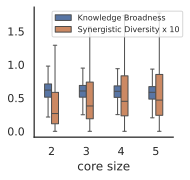

In [333]:

dfplot=pd.DataFrame()
maxSS=maxS-2


for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='knowledgebroadness')[0][0]
    isize=np.where(significant_cores3[ gsize].columns=='synergisticcorediversity')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]     
    A['knowledgebroadness']=A['knowledgebroadness']/np.log2(19)
    A['synergisticcorediversity']=10*A['synergisticcorediversity']
    A=A[['size','knowledgebroadness','synergisticcorediversity']]
    print(gsize,np.nanmedian(A['knowledgebroadness']),np.nanmedian(A['synergisticcorediversity']))
#     A=A[A['knowledgebroadness']>=1]  
    dfplot=pd.concat([dfplot ,A])
# Melt the DataFrame
melted_df = pd.melt(dfplot, id_vars=['size'], var_name='', value_name='value')
melted_df[''] = melted_df[''].map({'knowledgebroadness': 'Knowledge Broadness',
                                                   'synergisticcorediversity': 'Synergistic Diversity x 10'})
label_ff = 20;ff = 20;aa=7;bb=6;wspace_=.8;hspace_=.5;
fig = plt.figure(figsize=(aa, bb));


spec = gridspec.GridSpec(ncols=2, nrows=2,width_ratios=[1,1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])
ax = fig.add_subplot(spec[0])
ax=sns.boxplot(data=melted_df, x='size',y='value',hue='',showfliers=False,width=.4)    
# change_width(ax, .35)


plt.legend( title="",loc='upper left', 
           bbox_to_anchor=(.1, 1),fontsize=ff-12,ncol=1)
sns.despine(ax=ax)
plt.xlabel("core size")
plt.ylabel("");

In [318]:
melted_df

,size,variable,value
0,2,Knowledge Broadness,0.350995
1,2,Knowledge Broadness,0.534412
2,2,Knowledge Broadness,0.239157
3,2,Knowledge Broadness,0.158530
4,2,Knowledge Broadness,0.204729
...,...,...,...
1334733,5,Synergistic Core Diversity,0.015140
1334734,5,Synergistic Core Diversity,0.055854
1334735,5,Synergistic Core Diversity,0.033549
1334736,5,Synergistic Core Diversity,0.097976


In [275]:
fig = plt.figure(constrained_layout=True, figsize=(6, 4))

# create top/bottom subfigs
(subfig_a, subfig_b,subfig_c) = fig.subfigures(1, 3, wspace=0.1, width_ratios=[1, 1,1.5])
# subfigures(1, 2, hspace=0.05, height_ratios=[2, 3])

# put ax0 in top subfig
# ax0 = subfig_a.subplots()
# ax0.set_title('ax0')
# subfig_t.supxlabel('xlabel0')

# # create left/right subfigs nested in bottom subfig
# (subfig_bl, subfig_br) = subfig_b.subfigures(1, 2, wspace=0.1, width_ratios=[3, 1])

# # put ax1-ax3 in gridspec of bottom-left subfig
gs = subfig_a.add_gridspec(nrows=2, ncols=1)
ax1 = subfig_a.add_subplot(gs[0])
# ax2 = subfig_a.add_subplot(gs[1], sharey=ax1)
ax1.set_title('ax1')
ax2.set_title('ax2')
# ax3.set_title('ax3')
# ax2.get_yaxis().set_visible(False)
# ax3.get_yaxis().set_visible(False)
# subfig_bl.supxlabel('xlabel1-3')

# # put ax4 in bottom-right subfig
# ax4 = subfig_br.subplots()
# ax4.set_title('ax4')
# subfig_br.supxlabel('xlabel4')

Text(0.5, 1.0, 'ax2')

AttributeError: 'SubFigure' object has no attribute 'bbox_inches'

<Figure size 432x288 with 1 Axes>

4.247927513443585

In [212]:
# sns.set(style="darkgrid")
# iris = sns.load_dataset("iris")

# g0 = sns.JointGrid(x="sepal_width", y="sepal_length", data=iris)
# g0.plot_joint(sns.scatterplot, sizes=(10, 200), size=iris['petal_length'], legend='brief')
# g0.plot_marginals(sns.histplot, kde=True, color='k')

# g1 = sns.JointGrid(x="sepal_width", y="sepal_length", data=iris)
# g1.plot_joint(sns.scatterplot, sizes=(10, 200), size=iris['petal_width'], legend='brief')
# g1.plot_marginals(sns.histplot, kde=True, color='k')


# fig = plt.figure(figsize=(13,8))
# gs = gridspec.GridSpec(1, 2)

# mg0 = SeabornFig2Grid(g0, fig, gs[0])
# mg1 = SeabornFig2Grid(g1, fig, gs[1])

# gs.tight_layout(fig)

# plt.show()

### SI Fig age compositions z scores

In [ ]:
data_null_std = {
    "Team Size": [],  # This would be the range of team sizes you have
    "only_young": [],  # Percentages for each team size
    "only_midage": [],
    "only_oldage": [],
    "mixed_young_midage": [],
    "mixed_young_oldage": [],
    "mixed_midage_oldage": [],
    "mixed_all": []}
data_nullv2 = {
    "Team Size": [],  # This would be the range of team sizes you have
    "only_young": [],  # Percentages for each team size
    "only_midage": [],
    "only_oldage": [],
    "mixed_young_midage": [],
    "mixed_young_oldage": [],
    "mixed_midage_oldage": [],
    "mixed_all": []}
trials=20000
for gsize in range(2,maxSS):
    N = significant_cores3[gsize].shape[0]
    proportions=age_proportions_in_data[gsize]
    team_size = gsize
    means, std_devs = simulate_team_compositions(proportions, team_size, trials)
    data_null_std["Team Size"].append(gsize)
    data_nullv2
    for k in means.keys():
        data_nullv2[k].append(round(100*means[k],1)) 
    for k in std_devs.keys():
        data_null_std[k].append(round(100*std_devs[k],3)) 

In [ ]:
label_ff = 15;ff = 20;aa=5;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=2,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])


# First, compute the percentage differences.
percentage_differences  = {key: [(a - b) / std if std != 0 else 0 for a, b, std in zip(data[key], data_null[key], data_null_std[key])]
            for key in data if key != 'Team Size'}
# Convert the percentage differences dictionary to a DataFrame for plotting.
df_percentage_diff = pd.DataFrame(percentage_differences)
df_percentage_diff['Team Size'] = data['Team Size']

# Melt the DataFrame to have team sizes, categories, and percentage differences for the bar plot.
df_long_diff = df_percentage_diff.melt(id_vars='Team Size', var_name='Category', value_name='Percentage Difference')
# df_long_diff=df_long_diff[df_long_diff['Team Size']<5]
# Split the DataFrame into 'only' and 'mixed' categories
df_only = df_long_diff[df_long_diff['Category'].str.contains('only')]
df_mixed = df_long_diff[~df_long_diff['Category'].str.contains('only')]

# Define the palette for team sizes
palette = sns.color_palette('coolwarm', len(df_percentage_diff['Team Size'].unique()))


ax = fig.add_subplot(spec[0])
# Plot for 'only' categories
sns.barplot(x='Category', y='Percentage Difference',  hue='Team Size', data=df_only, palette=palette)
ax.set_ylabel('z-score')
ax.set_xlabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().spines['bottom'].set_position(('data', 0))

sns.despine(ax=ax)

ax = fig.add_subplot(spec[1])
# Plot for 'mixed' categories
sns.barplot(x='Category', y='Percentage Difference', hue='Team Size',  data=df_mixed, palette=palette)
ax.set_ylabel('z-score')
ax.set_xlabel('Category')
plt.legend([],loc='upper left', bbox_to_anchor=(1, 1))
sns.despine(ax=ax)
plt.gca().spines['bottom'].set_position(('data', 0))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
label_ff = 15;ff = 20;aa=5;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=2,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1,1])


# First, compute the percentage differences.
percentage_differences = {key: [((a - b) / b * 100) if b != 0 else 0 for a, b in zip(data[key], data_null[key])]
                          for key in data if key != 'Team Size'}
# Convert the percentage differences dictionary to a DataFrame for plotting.
df_percentage_diff = pd.DataFrame(percentage_differences)
df_percentage_diff['Team Size'] = data['Team Size']

# Melt the DataFrame to have team sizes, categories, and percentage differences for the bar plot.
df_long_diff = df_percentage_diff.melt(id_vars='Team Size', var_name='Category', value_name='Percentage Difference')
df_long_diff=df_long_diff[df_long_diff['Team Size']<5]
# Split the DataFrame into 'only' and 'mixed' categories
df_only = df_long_diff[df_long_diff['Category'].str.contains('only')]
df_mixed = df_long_diff[~df_long_diff['Category'].str.contains('only')]

# Define the palette for team sizes
palette = sns.color_palette('coolwarm', len(df_percentage_diff['Team Size'].unique()))


ax = fig.add_subplot(spec[0])
# Plot for 'only' categories
sns.barplot(x='Category', y='Percentage Difference', hue='Team Size', data=df_only, palette=palette)
ax.set_title('Percentage Difference for "Only" Categories')
ax.set_ylabel('Percentage Difference (%)')
ax.set_xlabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().spines['bottom'].set_position(('data', 0))

sns.despine(ax=ax)

ax = fig.add_subplot(spec[1])
# Plot for 'mixed' categories
sns.barplot(x='Category', y='Percentage Difference', hue='Team Size',  data=df_mixed, palette=palette)
# ax.set_title('Percentage Difference for "Mixed" Categories')
ax.set_ylabel('Percentage Difference (%)')
ax.set_xlabel('Category')
plt.legend([],loc='upper left', bbox_to_anchor=(1, 1))
sns.despine(ax=ax)
plt.gca().spines['bottom'].set_position(('data', 0))


plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



### SI: Career ages at time of core formation

In [ ]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
#     x=pd.DataFrame();    x['fy']=np.array(A['frac_young']);x['fm']=np.array(A['frac_midage']);    x['gsize']=gsize;
    x=pd.DataFrame();    x['young']=[np.mean(A['frac_young'])];
    x['emerging']=[np.mean(A['frac_midage'])];x['established']=[np.mean(A['frac_oldage'])];   
    x.index=[gsize];
    dfplot2=pd.concat([dfplot2,x])
df_ageatformation=dfplot2.copy()
label_ff = 20;ff = 20;aa=1.1;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
# ax=sns.boxplot(data=dfplot2, x="gsize", y="fy",color='#f03b20',showfliers=False);
# ax=sns.barplot(data=dfplot2, x="gsize", y="fy",color='#f03b20');
ax=dfplot2.plot(ax=ax,kind='bar', stacked=True, color=['#fee8c8','#fdbb84','#e34a33'])

plt.xlabel('core size');plt.ylabel('fraction of researchers \nat core formation');
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(.9, .97), title='',framealpha=.0)

plt.tight_layout()


# plt.savefig('teamsfig_ScientistsAgeAtCoreFormation.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_ScientistsAgeAtCoreFormation.png',dpi=300, bbox_inches = "tight")


### geodiversity

In [ ]:
dfplot=pd.DataFrame()
label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

for gsize in range(2,maxSS):
    icd=np.where(significant_cores3[gsize].columns=='geodiversities_countries')[0][0]
    isize=np.where(significant_cores3[gsize].columns=='size')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]       
    A=A.iloc[:,[isize,icd]]
    
    dfplot=pd.concat([dfplot ,A])
#     ax=sns.kdeplot(data=A.dropna(), x="geodiversities_countries",label='coresize='+str(gsize));
ax=sns.histplot(data=dfplot.dropna(), x="geodiversities_countries",bins=20,alpha=.6,stat = "probability");
# ax=sns.violinplo|t(data=dfplot.dropna(), x="core_diversity",y='size');


# ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.xlabel('core size');plt.ylabel('disciplinary diversity of core');
# plt.savefig('teamsfig_core_concept_diversity.png',dpi=300, bbox_inches = "tight")


In [ ]:


dfplot=pd.DataFrame()
label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

for gsize in range(2,maxS):
    icd=np.where(significant_cores3[gsize].columns=='unidiversities')[0][0]
    isize=np.where(significant_cores3[gsize].columns=='size')[0][0]

    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]       
    A=A.iloc[:,[isize,icd]]
    
    dfplot=pd.concat([dfplot ,A])
#     ax=sns.kdeplot(data=A.dropna(), x="geodiversities_countries",label='coresize='+str(gsize));
ax=sns.histplot(data=dfplot.dropna(), x="unidiversities",bins=20,alpha=.6,stat = "probability");
# ax=sns.violinplo|t(data=dfplot.dropna(), x="core_diversity",y='size');


# ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.xlabel('core size');plt.ylabel('disciplinary diversity of core');
# plt.savefig('teamsfig_core_concept_diversity.png',dpi=300, bbox_inches = "tight")


## Concept Diversity 

In [ ]:
# dfplot=pd.DataFrame()
# label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])
# sns.set_style('white')  # Set the style to 'whitegrid'

# for gsize in range(2,maxSS):
#     icd=np.where(significant_cores3[gsize].columns=='synergisticcorediversity')[0][0]
#     isize=np.where(significant_cores3[gsize].columns=='size')[0][0]
#     print(gsize,end='\r')
#     A=significant_cores3[gsize]
#     A=A[A['w']>=5]
#     A=A[A['persistance_time']>=1]       
#     A=A.iloc[:,[isize,icd]]
    
#     dfplot=pd.concat([dfplot ,A])
#     ax=sns.kdeplot(data=A.dropna(),clip=[0,1], x="synergisticcorediversity",label='coresize='+str(gsize));
# # ax=sns.violinplo|t(data=dfplot.dropna(), x="core_diversity",y='size');
# # ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);

# sns.despine(ax=ax)
# plt.tight_layout()
# # plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.xlabel('synergistic core diversity');plt.ylabel('pdf');
# plt.legend();


## monodisciplinarity

In [ ]:
# dfplot=pd.DataFrame()
# label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])

# for gsize in range(2,maxS):
#     icd=np.where(significant_cores3[gsize].columns=='monodisciplinarity')[0][0]
#     isize=np.where(significant_cores3[gsize].columns=='size')[0][0]

#     print(gsize,end='\r')
#     A=significant_cores3[gsize]
#     A=A[A['w']>=5]
#     A=A[A['persistance_time']>=1]       
#     A=A.iloc[:,[isize,icd]]
    
#     dfplot=pd.concat([dfplot ,A])
# ax=sns.histplot(data=dfplot.dropna(), x="monodisciplinarity",bins=30,alpha=.2,stat = "probability");
# # ax=sns.kdeplot(data=dfplot.dropna(), x="monodisciplinarity",hue='size',palette=sns.color_palette("pastel",6),label='coresize='+str(gsize));

# sns.despine(ax=ax)
# plt.tight_layout()
# # plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.ylabel('pdf');plt.xlabel('monodisciplinarity of core');
# plt.savefig('teamsfig_core_monodisciplinarity.png',dpi=300, bbox_inches = "tight")
# plt.legend();

In [ ]:
# dfplot=pd.DataFrame()
# label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])

# for gsize in range(2,maxS):
#     icd=np.where(significant_cores3[gsize].columns=='knowledgebroadness')[0][0]
#     isize=np.where(significant_cores3[gsize].columns=='size')[0][0]

#     print(gsize,end='\r')
#     A=significant_cores3[gsize]
#     A=A[A['w']>=5]
#     A=A[A['persistance_time']>=1]       
#     A=A.iloc[:,[isize,icd]]
    
#     dfplot=pd.concat([dfplot ,A])
# ax=sns.histplot(data=dfplot.dropna(), x="knowledgebroadness",bins=30,alpha=.2,stat = "probability");
# # ax=sns.kdeplot(data=dfplot.dropna(), x="monodisciplinarity",hue='size',palette=sns.color_palette("pastel",6),label='coresize='+str(gsize));
# bins = np.arange(10)

# sns.despine(ax=ax)
# plt.tight_layout()
# # plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.ylabel('pdf');plt.xlabel('knowledge broadness of core');
# plt.legend();

In [ ]:
# dfplot=pd.DataFrame()
# label_ff = 20;ff = 20;aa=8;bb=2;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])

# for gsize in range(2,maxS):
#     icd=np.where(significant_cores3[gsize].columns=='monodisciplinarity')[0][0]
#     isize=np.where(significant_cores3[gsize].columns=='core_diversity')[0][0]

#     print(gsize,end='\r')
#     A=significant_cores3[gsize]
#     A=A[A['w']>=5]
#     A=A[A['persistance_time']>=1]       
#     A=A.iloc[:,[isize,icd]]
    
# #     dfplot=pd.concat([dfplot ,A])
#     ax=sns.regplot(data=A.dropna(), x="monodisciplinarity", y="core_diversity" , x_estimator=np.mean, order=1)

# # ax=sns.barplot(data=dfplot.dropna(), x="size", y="core_diversity",color='#99d8c9',errwidth=1.5);

# # sns.despine(ax=ax)
# # plt.tight_layout()
# # # plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# # plt.xlabel('core size');plt.ylabel('monodisciplinarity of core');
# # plt.savefig('teamsfig_core_monodisciplinarity.png',dpi=300, bbox_inches = "tight")
# # plt.legend()

In [ ]:
# dfplot=pd.DataFrame()
# maxSS=maxS-2


# for gsize in range(2,maxSS):
#     icd=np.where(significant_cores3[gsize].columns=='knowledgebroadness')[0][0]
#     isize=np.where(significant_cores3[ gsize].columns=='synergisticcorediversity')[0][0]

#     print(gsize,end='\r')
#     A=significant_cores3[gsize]
#     A=A[A['w']>=5]
#     A=A[A['persistance_time']>=1]       
#     A=A[A['knowledgebroadness']>=1]  
#     dfplot=pd.concat([dfplot ,A])

#     print(gsize,np.nanmean(dfplot['knowledgebroadness']),np.nanmean(dfplot['synergisticcorediversity']))



# hb = plt.hexbin(dfplot['knowledgebroadness'], dfplot['synergisticcorediversity'], gridsize=50, cmap='Blues', 
#                 mincnt=1, norm=matplotlib.colors.LogNorm())


In [ ]:
props=['knowledgebroadness','synergisticcorediversity']

for i in range(len(props)):
    for j in range(i+1,len(props)):
        print(props[i],', ',props[j],'---')       
        for gsize in range(2,maxS):
            A=significant_cores3[gsize].dropna()
            A=A[A['w']>10]
            A=A[A['persistance_time']>=1]
            A=A[A['knowledgebroadness']>=1]
#             A=A[A['c5_av']>=0]
            
            r,p=stats.spearmanr(A[props[i]],A[props[j]])
            print('core size = ',gsize,r', r=',round(r,2),r', p=',round(p,3))       


# 3. Formation of cores

In [ ]:
for gsize in range(2,maxS):
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
    print(round(A.shape[0]/significant_cores3[gsize].shape[0]*100,1))
    
    print(gsize,' team size, % of teams created in one-shot= ',A['is_formed_in_one_shot'].sum()*100/A.shape[0])
#         print(gsize,' team size, % of te ams created in one-shot= ',significant_cores3[gsize]['is_formed_in_one_shot'].sum())

In [ ]:
dfplot = pd.DataFrame()
x=[]
maxS=8
for gsize in range(3,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
    x.append(A['is_formed_in_one_shot'].sum()*100/A.shape[0])
    
dfplot['gsize']=[gsize for gsize in range(3,maxS)]
dfplot['% cores formed in one-shot']=x
#     dfplot.append(x.T)
aa=2;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
ax=sns.barplot(data=dfplot, x="gsize", y="% cores formed in one-shot",color='#99d8c9',errwidth=1.5);
plt.xlabel('core size');plt.ylabel('% established at once');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig1.pdf',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_FracGrowingTeams.png',dpi=300, bbox_inches = "tight")

## Impact of first paper by a) one shot assembled, b) teams the grow


In [ ]:
x=[];y=[];
dfplot = pd.DataFrame()

for gsize in range(3,maxS):
    print(gsize,end='\r')


    A= pd.DataFrame()
    a=significant_cores3[gsize][significant_cores3[gsize]['is_formed_in_one_shot']==True]
    a=a[a['w']>=5]
    a=a[a['persistance_time']>=1]
    A['c5 first paper']=a['c5_first']
    A['gsize']=gsize
    A['']='established at once'
    dfplot=pd.concat([dfplot,A])
    
    A= pd.DataFrame()
    b=significant_cores3[gsize][significant_cores3[gsize]['is_formed_in_one_shot']==False]
    b=b[b['w']>=5]
    b=b[b['persistance_time']>=1]
    A['c5 first paper']=b['c5_first']
    A['gsize']=gsize
    A['']='growing'
    dfplot=pd.concat([dfplot,A])
    

aa=4;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
pal=['#99d8c9','#2ca25f']
ax=sns.barplot(data=dfplot, x="gsize", y="c5 first paper",hue='',errwidth=1.5,palette=pal);
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.legend(frameon=True,loc='lower right',framealpha=0.5)
plt.legend(bbox_to_anchor=(.7, .8), title='',framealpha=.1)

# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('Impact of first paper');
plt.savefig('teamsfig_GrowingAndImpact.png',dpi=300, bbox_inches = "tight")

growing teams, might consist on average of older members cmpared to instantly fromed teams.


CONFIRM. If so, possibe reason for this. 

In [ ]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]

    Y=np.array(A['w'])
    X=np.array(A['size'])

    
    x=pd.DataFrame();    x['number of coauthored papers']=Y;    x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])


label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
ax=sns.boxplot(data=dfplot2, x="gsize", y="number of coauthored papers",color='#f03b20',showfliers=False);

plt.yticks([5,10,15,20,25,30])
plt.xlabel('core size');plt.ylabel('num papers coauthored');
sns.despine(ax=ax)

plt.tight_layout()

# plt.savefig('teamsfig_numpapers(W).svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_numpapers(W).png',dpi=300, bbox_inches = "tight")


In [ ]:
x=pd.DataFrame();    
x['frac_young']=[np.mean(A['frac_young'])];
x['frac_midage']=[np.mean(A['frac_midage'])];   
x.set_['gsize']=[gsize];
x


# 4. Exclusivity
fraction of papers by members as part of team/ total combined number of papers by all member
during time of core together - from first pub to last pub together.


In [ ]:
frac_part_of_core=[]
dfplot2=pd.DataFrame();
for  gsize in range(2,maxS):
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['work_counts_UNION']>0]
    A=A[A['exclusivity']<=1]

    
    x=pd.DataFrame();    x['exclusivity']=np.array(A['w']/A['work_counts_UNION']);    x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    
#     print(A.shape[0]/significant_cores3[gsize].shape[0])
    print(gsize,'----',round(np.mean(A['w']/A['work_counts_UNION']),2))
    frac_part_of_core.append(np.mean(A['w']/A['work_counts_UNION']))
    

In [ ]:
dfplot = pd.DataFrame()
x=[]
dfplot['gsize']=[gsize for gsize in range(2,maxS)]
dfplot['exclusivity of core']=frac_part_of_core
#     dfplot.append(x.T)

label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
# ax=sns.boxplot(data=dfplot2, x="gsize", y="exclusivity",showfliers=False,color='#99d8c9');
ax=sns.barplot(data=dfplot2, x="gsize", y="exclusivity",color='#99d8c9',errwidth=1.5);
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('exclusivity of core');
# plt.savefig('teamsfig_Exclusivity.png',dpi=300, bbox_inches = "tight")


Exclusivity increases with coresize, only highly exclusive teams can support larger core sizes. Being part of a bigger core seems to require personal investment, reducing the percentage of non-core collaborations.

This can be explained by the fact that most cores grow slowly over years (3 year per new memmber addition) instead of being formed instantly, thus, the core publishes more papers together over the years.

In [ ]:
np.mean(frac_part_of_core)


- On average, 38.0 % of teams individual work is published with the persistent core.

### Exclusivity vs Impact

- Exclusivity provides gradient in impact given a core size, refinement of dashun's message.


In [ ]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['w2018']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['work_counts_UNION']>0]
    A=A[A['exclusivity']<=1]

    Y=np.array(A['exclusivity'])
    X=np.array(A['c5_av'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.9,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    
    x=pd.DataFrame();    x['c5']=y90;    x['exclusivity']='top 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();  x['c5']=y10;    x['exclusivity']='bottom 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['exclusivity']=y10;    x['c5']='bottom 20%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

    res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
    print(gsize, res1)


label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot2, x="gsize", y="c5",hue='exclusivity',errwidth=1.5,palette=['#f6eff7','#bdc9e1']);

sns.despine(ax=ax)
plt.xlabel('core size');plt.ylabel('avg impact');
# plt.legend(framealpha=0.5)
plt.legend(bbox_to_anchor=(.51, .53), title='exclusivity',framealpha=.8)

# plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_ExclusivityAndImpact.png',dpi=300, bbox_inches = "tight")


# 4.5 Impact

### Random Impact Rule

In [160]:
for gsize in range(3,4):
    print(gsize,end='\r')

    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        c5=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    break
import random
f_high=[]
f_high_shuffled=[]
for n in range(len(I)-1):
    x=c5[I[n]:I[n+1]]
    if np.mean(x)>.05 and len(x)>10 and (np.nan not in x):
#         print(n,'---',np.where(np.max(x)==x)[0])
        f_high.append(np.where(np.max(x)==x)[0][0]/len(x))
        y=random.sample(sorted(x), len(x))
        f_high_shuffled.append(np.where(np.max(y)==y)[0][0]/len(y))

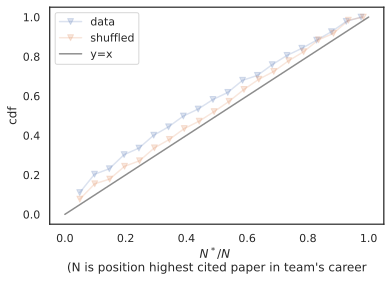

In [161]:
# plt.hist(f_high,alpha=.2)
# plt.hist(f_high_shuffled,alpha=.2);
def plotCDF(data,label):
    count, bins_count = np.histogram(data, bins=20)
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)
    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    # plotting PDF and CDF
#     plt.plot(bins_count[1:], pdf, color="red", label="PDF")
    plt.plot(bins_count[1:], cdf,'v-', label=label,alpha=.2);
plotCDF(f_high,'data')
plotCDF(f_high_shuffled,'shuffled')
plt.plot([0,1], [0,1],'k-', label='y=x',alpha=.5);

plt.ylabel('cdf');plt.xlabel("$N^*/N$ \n(N is position highest cited paper in team's career");
plt.legend()


In [163]:
len(f_high_shuffled)

28723

## Average impact

In [ ]:
dfplot=pd.DataFrame()
icd=np.where(significant_cores3[gsize].columns=='core_diversity')[0][0]
isize=np.where(significant_cores3[gsize].columns=='size')[0][0]
i1=np.where(significant_cores3[gsize].columns=='c5_av')[0][0]
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]   
    dfplot=pd.concat([dfplot ,A.iloc[:,[i1,isize,icd]]])

meanlineprops = dict(linestyle='--', linewidth=1.5, color='k')
medianprops = dict(linestyle='--', linewidth=1.5, color='white')

# sns.boxplot(data=dfplot.dropna(), x="size", y="c5_av",showfliers=False,showmeans=True,meanline=True,meanprops=meanlineprops,medianprops=medianprops);




label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot.dropna(), x="size", y="c5_av",color='#99d8c9',errwidth=1.5);

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('avg c5 (papers)')
plt.savefig('teamsfig_Impact.png',dpi=300, bbox_inches = "tight")


why less c5 for bigger cores?
in general bigger teams are known to get more impact, so why a falling trend for higher core size?
perhaps big teams which get more impact are the non-persistent ones?


 - EXCLUSIVITY procvides gradient?-- Refinement of dashun's message


## Impact vs Career

In [ ]:
dfplot2=pd.DataFrame()
min_impact=0.1
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['w2018']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['c5_half1']>min_impact]    
    A=A[A['c5_half2']>min_impact]  

    x=pd.DataFrame();    x['c5']=np.array(A['c5_half1']);    x['career stage']='first half';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();    x['c5']=np.array(A['c5_half2']);    x['career stage']='second half';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])


label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
pal=['#bcbddc','#756bb1']
ax=sns.barplot(data=dfplot2, x="gsize", y="c5",hue='career stage',palette=pal,errwidth=1.5);
#efedf5
sns.despine(ax=ax)
plt.xlabel('core size');plt.ylabel('avg impact');
# plt.legend(framealpha=0.5)
plt.legend(bbox_to_anchor=(.51, .53), title='career stage',framealpha=.7);

# plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_ImpactAndCareer.png',dpi=300, bbox_inches = "tight")


In [ ]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize)
    
    A=significant_cores3[gsize]
    A=A[A['w2018']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['c5_half1']>min_impact]    
    A=A[A['c5_half2']>min_impact]    
    A['c5 ratio']=np.divide(np.array(A['c5_half1']),np.array(A['c5_half2']))
    print('% cores with higher impact in first half= ',round(100* A[A['c5 ratio']>1].shape[0]/A.shape[0],1))
#     x=pd.DataFrame();    x['c5 ratio']=np.divide(np.array(A['c5_half1']),np.array(A['c5_half2']));    x['career stage']='first half';x['gsize']=gsize;
    
#     dfplot2=pd.concat([dfplot2,x])


# label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])
# pal=['#bcbddc','#756bb1']
# ax=sns.barplot(data=dfplot2, x="gsize", y="c5 ratio",color=pal[1]);
# #efedf5
# sns.despine(ax=ax)
# plt.xlabel('core size');plt.ylabel(r'$\frac{impact \ first \ half}{impact\ second\ half}$');
# # plt.legend(framealpha=0.5)
# plt.legend(bbox_to_anchor=(.51, .53), title='career stage',framealpha=.4)

# plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig_ImpactAndCareer.png',dpi=300, bbox_inches = "tight")


## Gallo: Given core size, find effect of team size on impact. 
- Should be growing in general (DASHUN)
- Find optimum coresize given core size.
- Make dictionary --  

In [ ]:
with open(path_career+'dict_c5_norm.pkl', 'rb') as f:
    dict_c5_norm=pickle.load(f) 
    
with open(path_career+'dict_papersteamsizes.pkl', 'rb') as f:
    dict_papersteamsizes=pickle.load(f) 

In [ ]:
# c5_all=np.array(list(dict_c5_norm.values()))
# teamsizes_all=np.array([dict_papersteamsizes.get(x,np.nan) for x in dict_c5_norm.keys()])



In [ ]:
X=c5_all[~np.isnan(teamsizes_all)]
Y=teamsizes_all[~np.isnan(teamsizes_all)]

In [ ]:
ind=np.where(X>0)
print(stats.spearmanr(X[ind],Y[ind]))

In [ ]:
with open(path_career+'corrimpactteamsize.pkl', 'rb') as f:
    corrimpactteamsize=pickle.load(f) 
with open(path_career+'corrimpactteamsizenumpapers.pkl', 'rb') as f:
    numpapers=pickle.load(f) 

for gsize in range(2,maxS):
    t_ic = time.time();
    print(gsize,end='\r')


In [ ]:
corrimpactteamsize={}
numpapers={}

for gsize in range(2,maxS):
    t_ic = time.time();
    print(gsize)
    corrimpactteamsize[gsize]=[]
    numpapers[gsize]=[]
    with open(path_career+'significant_cores(c5norm)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        c5=pickle.load(f) 
    with open(path_career+'significant_cores(teamsizes)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        teamsizes=pickle.load(f) 
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
        
    print(stats.spearmanr(c5,teamsizes))
    c5=np.array(c5)
    teamsizes=np.array(teamsizes)
    ind=np.where(c5>0)
    print(stats.spearmanr(c5[ind],teamsizes[ind]))
        



In [ ]:
gsize=2
X=np.array(numpapers[gsize])
Y=np.array(corrimpactteamsize[gsize])
c=np.array([x[0] for x in Y])
p=np.array([x[0] for x in Y])

Yc
ind=np.where((X>20)&(p<.01))


In [ ]:
plt.hist(c[ind],density=True)

In [ ]:
# from scipy import stats
# dfplot2=pd.DataFrame()
# for gsize in range(2,maxS):
#     print(gsize,end='\r')
#     A=significant_cores3[gsize]
# #     A=A.dropna()
#     X=np.array(A['core_diversity'])
#     Y=np.array(A['c5_av'])

#     Z=sorted(X); p90=Z[int(round(len(Z)*.1,0))];p10=Z[int(round(len(Z)*.1,0))]; 
#     ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
#     x90=X[ind90];x10=X[ind10];
#     y90=Y[ind90];y10=Y[ind10];
    
#     x=pd.DataFrame();    x['c5']=y90;    x['interdisciplinarity']='top 10%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['c5']=y10;    x['interdisciplinarity']='bottom 10%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

# #     res1 = stats.spearmanr(x90,y90)
# #     res2 = stats.spearmanr(x10,y10)
# #     print(gsize, res1,res2)


In [ ]:

# label_ff = 20;ff = 20;aa=6;bb=4;wspace_=.5;hspace_=.3;
# fig = plt.figure(figsize=(aa, bb));
# spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
# ax = fig.add_subplot(spec[0])
# 
# ax=sns.barplot(data=dfplot2, x="gsize", y="c5",hue='interdisciplinarity');

# sns.despine(ax=ax)
# plt.tight_layout()
# # plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.xlabel('core size');plt.ylabel('c5 of first paper by core (normalized)')
# plt.savefig('teamsfig8.pdf',dpi=300, bbox_inches = "tight")


## Impact vs discipline diversity of core

In [ ]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['c5_av']>0]    
    Y=np.array(A['core_diversity'])
    X=np.array(A['c5_av'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.1,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    x=pd.DataFrame();  x['interdisciplinarity']=y10;    x['c5']='bottom \n10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    
    x=pd.DataFrame();    x['interdisciplinarity']=y90;    x['c5']='top \n10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])

#     res1 = stats.spearmanr(x90,y90)
#     res2 = stats.spearmanr(x10,y10)
#     print(gsize, res1,res2)



label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

# ax=sns.barplot(data=dfplot2, x="gsize", y="interdisciplinarity",hue='c5',errwidth=1.5,palette=['#f6eff7','#bdc9e1']);
ax=sns.barplot(data=dfplot2,  y="interdisciplinarity",x='c5',errwidth=1.5,palette=['#f6eff7','#bdc9e1']);

sns.despine(ax=ax)
# plt.xlabel('core size');plt.ylabel('interdisciplinarity of papers')
# plt.legend(bbox_to_anchor=(.55, .5), title='impact',framealpha=.1)

plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_InterdisciAndImpact.pdf',dpi=300, bbox_inches = "tight")


## Fede M: Displine wise analysis of exclusivity: Anthropology, Applied physics (big experminents, more human resource)

# 6. Non core members

In [ ]:
x=[]
y=[]
y_err=[]
ci=[]
dfplot=pd.DataFrame();   
for gsize in range(2,maxS):
    nNonCor=[]
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        num_noncore=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    for n in range(len(I)-1):
        nNonCor.append(np.mean(num_noncore[I[n]:I[n+1]]))
        frac_onlycore.append(np.mean(np.array(num_noncore[I[n]:I[n+1]])==0))
    nNonCor=np.array(nNonCor)
    frac_onlycore=np.array(frac_onlycore)
    A=significant_cores3[gsize]
    ind=np.where((A['w']>=5)&(A['persistance_time']>=1))[0]
    nNonCor=nNonCor[ind]
    frac_onlycore=frac_onlycore[ind]
    
    
    x=pd.DataFrame();    x['nnc']=nNonCor;    x['gsize']=gsize;
    dfplot=pd.concat([dfplot,x])
    
#     print(np.mean(nNonCor))
    print(gsize,end='\r')
#     X=pd.DataFrame()
#     x.append(gsize)
#     y.append(np.mean(nNonCor))
#     y_err.append(np.var(nNonCor)**.5/len(nNonCor)**.5)
#     df_
   
#     ci.append(1.96 * np.std(nNonCor)/np.sqrt(len(nNonCor)))

# x=np.array(x);y=np.array(y);ci=np.array(ci)

label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.boxplot(data=dfplot, x="gsize", y="nnc",color='#f03b20',showfliers=False);
# ax.errorbar(x,y,y_err ,'-o',ls='-.', mfc='w',mec='w', ms=0,lw=2, mew=2,color='#beaed4',ecolor='#beaed4',alpha=.8)
# ax.plot(x,y ,'-o',  ms=2,lw=2, mew=2,color='#beaed4',alpha=.8)
# ax.plot(x,y)
# ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

sns.despine(ax=ax)
plt.tight_layout()
# ax.set_xticks(range(2,maxS))
ax.set_yticks([0,1,2,3,4])
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('num of noncore members')
plt.savefig('teamsfig_numbernoncore.png',dpi=300, bbox_inches = "tight")

## % papers solely with core members *no externals

In [ ]:
x=[]
y=[]
y_err=[]
ci=[]
dfplot=pd.DataFrame();   
for gsize in range(2,maxS):
    nNonCor=[]
    frac_onlycore=[]
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        num_noncore=pickle.load(f)
    with open(path_career+'significant_cores(papers_shared)'+str(gsize)+'ind_time_ordered.pkl', 'rb') as f:
        I=pickle.load(f) 
    for n in range(len(I)-1):
        nNonCor.append(np.mean(num_noncore[I[n]:I[n+1]]))
        frac_onlycore.append(np.mean(np.array(num_noncore[I[n]:I[n+1]])==0))
    nNonCor=np.array(nNonCor)
    frac_onlycore=np.array(frac_onlycore)
    A=significant_cores3[gsize]
    ind=np.where((A['w']>=5)&(A['persistance_time']>=1))[0]
    nNonCor=nNonCor[ind]
    frac_onlycore=frac_onlycore[ind]
    
    
    x=pd.DataFrame();    x['frac_onlycore']=frac_onlycore;    x['gsize']=gsize;
    dfplot=pd.concat([dfplot,x])
    
#     print(np.mean(nNonCor))
    print(gsize,end='\r')
#     X=pd.DataFrame()
#     x.append(gsize)
#     y.append(np.mean(nNonCor))
#     y_err.append(np.var(nNonCor)**.5/len(nNonCor)**.5)
#     df_
   
#     ci.append(1.96 * np.std(nNonCor)/np.sqrt(len(nNonCor)))

# x=np.array(x);y=np.array(y);ci=np.array(ci)



In [ ]:


label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot, x="gsize", y="frac_onlycore",color='#f03b20');
# ax.errorbar(x,y,y_err ,'-o',ls='-.', mfc='w',mec='w', ms=0,lw=2, mew=2,color='#beaed4',ecolor='#beaed4',alpha=.8)
# ax.plot(x,y ,'-o',  ms=2,lw=2, mew=2,color='#beaed4',alpha=.8)
# ax.plot(x,y)
# ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

sns.despine(ax=ax)
plt.tight_layout()
# ax.set_xticks(range(2,maxS))
# ax.set_yticks([0,1,2,3,4])
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
plt.xlabel('core size');plt.ylabel('% papers by core with \nonly the core members')
plt.savefig('teamsfig_FracPapersNoNoncore.png',dpi=300, bbox_inches = "tight")

## Percentages of num_noncore_core members

In [149]:

from collections import Counter
import collections
Y0=[]
for gsize in range(2,maxS):
    print(gsize)
    with open(path_career+'significant_cores(num_noncore)'+str(gsize)+'_time_ordered.pkl', 'rb') as f:
        num_noncore=pickle.load(f)
    print(np.mean(num_noncore))
    print(gsize,end='\r')

    X=collections.OrderedDict(sorted(Counter(num_noncore).items()))
    Y={x:round(100*X[x]/sum(X.values()),1) for x in X.keys()}
    print(Y)
    Y0.append(Y[0])

2
0.8518307520747852
{0: 55.3, 1: 23.4, 2: 11.1, 3: 5.3, 4: 2.6, 5: 1.3, 6: 0.7, 7: 0.4}
3
1.2047351481307642
{0: 43.1, 1: 24.7, 2: 14.9, 3: 8.5, 4: 4.7, 5: 2.7, 6: 1.4}
4
1.4006176420240528
{0: 35.7, 1: 25.0, 2: 17.4, 3: 11.1, 4: 7.0, 5: 3.8}
5
1.1817391525288383
{0: 39.6, 1: 25.9, 2: 17.5, 3: 10.9, 4: 6.1}
6
0.8630235917188253
{0: 48.8, 1: 25.6, 2: 16.1, 3: 9.5}
7
0.567701978470045
{0: 58.5, 1: 26.2, 2: 15.3}


In [ ]:
round(np.mean(Y0),1)

Across coresizes, on average  46.8 % of papers by cores are written exclusively by the core with no additional members. Moreover, 35-40 % of papers have 1-2 non-core members, and less than 20 % of papers have more than 2.


## ages of noncore members

<ipython-input-150-ca1ac6fe193e>:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


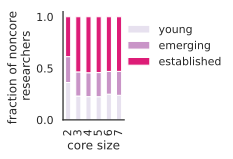

In [150]:
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]
#     x=pd.DataFrame();    x['fy']=np.array(A['frac_young']);x['fm']=np.array(A['frac_midage']);    x['gsize']=gsize;
    x=pd.DataFrame();    
    x['young']=[np.mean(A['noncore_frac_young'])];
    x['emerging']=[np.mean(A['noncore_frac_midage'])];
    x['established']=[np.mean(A['noncore_frac_oldage'])];   
    x.index=[gsize];
    dfplot2=pd.concat([dfplot2,x])
df_ageatformation=dfplot2.copy()
label_ff = 20;ff = 20;aa=1.1;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])
# ax=sns.boxplot(data=dfplot2, x="gsize", y="fy",color='#f03b20',showfliers=False);
# ax=sns.barplot(data=dfplot2, x="gsize", y="fy",color='#f03b20');
ax=dfplot2.plot(ax=ax,kind='bar', stacked=True, color=['#e7e1ef','#c994c7','#dd1c77'])

plt.xlabel('core size');plt.ylabel('fraction of noncore \nresearchers');
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(.9, .97), title='',framealpha=.0)

plt.tight_layout()

# plt.savefig('teamsfig_ScientistsAgeAtCoreFormation.svg',dpi=300, bbox_inches = "tight")
plt.savefig('teamsfig_NoncoreScientistsAges.png',dpi=300, bbox_inches = "tight")


# 7. Literature Search

In [153]:
gsize=2
# significant_cores3[gsize][significant_cores3[gsize]['w']<50]['w'].hist(bins=100)

In [152]:
dfplot = pd.DataFrame()

for gsize in range(2,maxS):
    print(gsize,end='\r')

    A= pd.DataFrame()
    A['search popularity']=significant_cores3[gsize]['corelitP']
    A['gsize']=gsize
#     A['']='instantly formed'
    dfplot=pd.concat([dfplot,A])
aa=4;bb=4;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="search popularity",color='#99d8c9',errwidth=1.5);
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

KeyError: 'corelitP'

In [ ]:
dfplot = pd.DataFrame()

for gsize in range(2,maxS):
    print(gsize,end='\r')

    A= pd.DataFrame()
    a=corelitD[gsize]
    A['search depth (years)']=a
    A['gsize']=gsize
#     A['']='instantly formed'
    dfplot=pd.concat([dfplot,A])
aa=4;bb=4;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="search depth (years)",color='#99d8c9',errwidth=1.5);
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

In [ ]:
x=[];y=[];
dfplot = pd.DataFrame()

for gsize in range(3,maxS):
    print(gsize,end='\r')

    A= pd.DataFrame()
    a=corelitD[gsize]
    A['cited literature depth (years)']=a
    A['gsize']=gsize
    A['instantaneous']=significant_cores3[gsize]['is_formed_in_one_shot']
    dfplot=pd.concat([dfplot,A])

aa=4;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="cited literature depth (years)",hue='instantaneous');
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

In [ ]:
x=[];y=[];
dfplot = pd.DataFrame()

for gsize in range(3,5):
    print(gsize,end='\r')

    A= pd.DataFrame()
    a=corelitP[gsize]
    A['cited literature popularity (years)']=a
    A['gsize']=gsize
    A['instantaneous']=significant_cores3[gsize]['is_formed_in_one_shot']
    dfplot=pd.concat([dfplot,A])

aa=4;bb=2;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])

# sns.boxplot(data=dfplot.dropna(), x="size", y="core_diversity",showfliers=False);
ax=sns.barplot(data=dfplot, x="gsize", y="cited literature popularity (years)",hue='instantaneous');
# plt.xlabel('core size');plt.ylabel('Average formation time \nfor cores (years)');
sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig5.png',dpi=300, bbox_inches = "tight")

In [ ]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
#     A=A.dropna()
    A=A[A['work_counts_UNION']>10]

    Y=np.array(A['exclusivity'])
    X=np.array(A['corelitD'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.9,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    
    x=pd.DataFrame();    x['corelitD']=y90;    x['exclusivity']='top 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();  x['corelitD']=y10;    x['exclusivity']='bottom 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['exclusivity']=y10;    x['c5']='bottom 20%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

    res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
    print(gsize, res1)


label_ff = 20;ff = 20;aa=6;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot2.dropna(), x="gsize", y="corelitD",hue='exclusivity');

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig7.png',dpi=300, bbox_inches = "tight")


In [ ]:
from scipy import stats
dfplot2=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    
    A=significant_cores3[gsize]
    A=A[A['work_counts_UNION']>10]
    Y=np.array(A['exclusivity'])
    X=np.array(A['corelitB'])

    Z=sorted(X); p90=Z[int(round(len(Z)*.9,0))];p10=Z[int(round(len(Z)*.1,0))]; 
    ind90=np.where(X>=p90)[0];ind10=np.where(X<=p10)[0];
    x90=X[ind90];x10=X[ind10];
    y90=Y[ind90];y10=Y[ind10];
    
    x=pd.DataFrame();    x['corelitB']=y90;    x['exclusivity']='top 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
    x=pd.DataFrame();  x['corelitB']=y10;    x['exclusivity']='bottom 10%';x['gsize']=gsize;
    dfplot2=pd.concat([dfplot2,x])
#     x=pd.DataFrame();  x['exclusivity']=y10;    x['c5']='bottom 20%';x['gsize']=gsize;
#     dfplot2=pd.concat([dfplot2,x])

    res1 = stats.spearmanr(X,Y)
#     res2 = stats.spearmanr(x10,y10)
    print(gsize, res1)


label_ff = 20;ff = 20;aa=6;bb=4;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

ax=sns.barplot(data=dfplot2.dropna(), x="gsize", y="corelitB",hue='exclusivity');

sns.despine(ax=ax)
plt.tight_layout()
# plt.savefig('teamsfig1.svg',dpi=300, bbox_inches = "tight")
# plt.savefig('teamsfig7.png',dpi=300, bbox_inches = "tight")


# 8. How long core persists after formation

In [ ]:
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    A=significant_cores3[gsize]
    x=pd.DataFrame()
    x['career length (years)']=list(A[(A['persistance_time']>1) &(A['persistance_time']<30)]['persistance_time'])
    x['core size']=gsize
    dfplot=pd.concat([dfplot,x])

label_ff = 20;ff = 20;aa=2;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal="crest"
ax=sns.boxplot(data=dfplot.dropna(), x="core size", y='career length (years)',showfliers=False,palette=pal);
sns.despine(ax=ax)
# plt.legend(bbox_to_anchor=(1, 1), title='core size')
plt.savefig('teamsfig_CareerLength.png',dpi=300, bbox_inches = "tight")


In [ ]:
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    for W in [5,10,15]:
        A=significant_cores3[gsize]
    
        A=A[A['w']==W]
        x=pd.DataFrame()
        x['time taken to produce (years)']=list(A[(A['persistance_time']>1) &(A['persistance_time']<30)]['persistance_time'])
        x['core size']=gsize
        x['number of papers by core']=W
        dfplot=pd.concat([dfplot,x])
#     .hist(bins=30,density=True,alpha=.5,label=gsize)
    
# plt.legend();

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal="flare"
ax=sns.boxplot(data=dfplot.dropna(), hue="core size", y='time taken to produce (years)',x='number of papers by core',showfliers=False,palette=pal);
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(1, 1), title='core size')
plt.savefig('teamsfig_ProductionRate.png',dpi=300, bbox_inches = "tight")

In [ ]:
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    for W in range(5,20):
        A=significant_cores3[gsize]
    
        A=A[A['w']==W]
        x=pd.DataFrame()
        x['time taken to produce (years)']=list(A[(A['persistance_time']>1) &(A['persistance_time']<30)]['persistance_time'])
        x['core size']=gsize
        x['number of papers by core']=W
        dfplot=pd.concat([dfplot,x])
#     .hist(bins=30,density=True,alpha=.5,label=gsize)
    
# plt.legend();

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal="flare"
ax=sns.boxplot(data=dfplot.dropna(), hue="core size", y='time taken to produce (years)',x='number of papers by core',showfliers=False,palette=pal);
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(1, 1), title='core size')
plt.savefig('teamsfig_ProductionRate.png',dpi=300, bbox_inches = "tight")

In [ ]:
# grouped = dfplot.groupby(['core size', 'number of papers by core'])
# summary = grouped['time taken to produce (years)'].agg(['mean', 'sem']).reset_index()
grouped = dfplot.groupby(['core size', 'number of papers by core'])['time taken to produce (years)']
summary = grouped.agg(mean='mean', sem=lambda x: stats.sem(x, ddof=1)).reset_index()

# Calculate the 95% confidence intervals
summary['ci_95'] = summary['sem'] * stats.t.ppf((1 + 0.95) / 2., grouped.count() - 1)

# Plot the curves with seaborn lineplot
plt.figure(figsize=(10, 6))
# ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size', style='core size', markers=True, err_style='bars', ci='sd')
ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size',  err_style='bars')
x=list(summary['number of papers by core']);
y=list(summary['mean']);y_err=summary['sem'];
alpha=.8;ini_=0;lw=2;ms=2
# ax.errorbar(x,y,y_err ,fmt='', mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='#beaed4',ecolor='#beaed4',alpha=alpha,label=r'NSF winners')

ax.errorbar(x,y,y_err ,fmt='none', mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='k',ecolor='k',alpha=alpha,label=r'NSF winners')

# ax = sns.lineplot(data=summary, x='number of papers by core', y='mean', hue='core size', err_style="bars", errorbar=("sem", 2))

plt.xlabel('number of papers by Core')
plt.ylabel('Mean Time Taken to Produce (Years)')
plt.title('Mean Time Taken to Produce vs. Number of Papers by Core Size')

sns.despine()

In [ ]:
dfplot.groupby(by=["core size",'number of papers by core']).mean()

# 9. Cores by Decades

In [ ]:
decades=[1970,1980,1990,2000,2010]
dfplot=pd.DataFrame()
for gsize in range(2,maxS):
    print(gsize,end='\r')
    A=significant_cores3[gsize]
    A=A[A['w']>=5]
    A=A[A['persistance_time']>=1]    
    A=A[A['work_counts_UNION']>0]
    A=A[A['exclusivity']<=1]
    for d in decades:
    #     significant_cores3[gsize]['first_paper_pubyear'].hist(bins=50)

    
        B=A[(A['first_paper_pubyear']>=d)&(A['first_paper_pubyear']<d+10)]
    
        x=pd.DataFrame()
        x['exclusivity']=list(B['exclusivity'])
        x['core size']=gsize
        x['decade']=d
        dfplot=pd.concat([dfplot,x])
#     A[A['first_paper_pubyear']>1950]['first_paper_pubyear'].hist(bins=50)

label_ff = 20;ff = 20;aa=4;bb=2;wspace_=.5;hspace_=.3;
fig = plt.figure(figsize=(aa, bb));
spec = gridspec.GridSpec(ncols=1, nrows=1,width_ratios=[1], wspace=wspace_,hspace=hspace_, height_ratios=[1])
ax = fig.add_subplot(spec[0])

pal=['#ffffcc','#c2e699','#78c679','#31a354','#006837']
# ax=sns.boxplot(data=dfplot, x="core size", y='exclusivity',hue='decade',showfliers=False,palette=pal);
ax=sns.barplot(data=dfplot, x="core size", y='exclusivity',hue='decade',palette=pal,errwidth=1.5);
sns.despine(ax=ax)
plt.legend(bbox_to_anchor=(1, 1), title='decade')
plt.savefig('teamsfig_ExclusivityByDecades.png',dpi=300, bbox_inches = "tight")

In [ ]:
significant_cores3[2].columns

# 10. Correlation check betweeen all quantities

In [ ]:
props=['c5_av', 'exclusivity','geodiversities_countries','geodiversities_continents','core_diversity','time_taken_to_accumulatev2']

for i in range(len(props)):
    for j in range(i+1,len(props)):
        print(props[i],', ',props[j],'---')       
        for gsize in range(2,5):
            A=significant_cores3[gsize].dropna()
            A=A[A['w']>10]
            A=A[A['persistance_time']>=1]
            A=A[A['c5_av']>=0]
            r,p=stats.spearmanr(A[props[i]],A[props[j]])
            print('core size = ',gsize,r', r=',round(r,2),r', p=',round(p,3))       


c5 first and c5 average are correlated, dynamics of citations.

# 11. Elite scientist cores

In [ ]:
gsize=2
A=significant_cores3[gsize]
A=A[A['w']>=5]
A=A[A['persistance_time']>=1]
G=A.sort_values(by=['c5_av'],ascending=False)


In [ ]:
x['display_na']

In [ ]:
it=15
core=G.iloc[it][0]
print(core)

In [ ]:

it=15
core=G.iloc[it][0]
for a in core:
    l='https://api.openalex.org/authors/'+a.split('/')[-1]
    headers = {
        'User-Agent': 'chowdhary_sandeep',
        'From': 'chowdhary_sandeep@phd.ceu.edu'  # This is another valid field
    }

    x = requests.get(l)    
    x= x.json()
#     'display_name','2yr_mean_citedness'
    print(x['display_name'])
    print(x['summary_stats']['2yr_mean_citedness'])
    print(x['last_known_institution']['display_name'])
    print(x['last_known_institution']['country_code'])
    print('-------------')
print('num papers ',G.iloc[it]['w'])

In [ ]:
x

In [ ]:
G['w'].mean()

# career age

In [ ]:
def cal_ages(la):
    xauths=list(la.iloc[:,0])
    xpapers=list(la.iloc[:,6])
    ll_ages=[]
    for it in range(len(xpapers)):
        print(it/len(xpapers),end='\r')
        list_ages=[]
#         for it_paper in range(len(xpapers[it])):
        ages=[]
        try: 
            pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][0]])
        except:
            pub_time=np.nan

        for it_auth in range(len(xauths[it])):
            try: 
                first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
            except:
                first_pub=np.nan
            ages.append(pub_time-first_pub)
        list_ages.append(ages)
        ll_ages.append(list_ages)
    return ll_ages



# c5 within discipline

In [ ]:
with open(path_career+'dict_c5_within.pkl', 'rb') as f:
    dict_c5_within=pickle.load(f) 
    
with open(path_career+'dict_c5_within_lvl1.pkl', 'rb') as f:
    dict_c5_within_lvl1=pickle.load(f) 

In [ ]:
def plot_c5within_coresize(TS):

    significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
    nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

    ups=[]
    for x in significant_cores3_sample2['papers_shared']:
        ups+=x
    ups=np.unique(ups)
    #______________________
    upns=[]
    for x in nonsignificant_cores3_sample2['papers_shared']:
        upns+=x
    upns=np.unique(upns)
    #______________________
    upns=set(upns).difference(set(ups))
    
    ups_cites=[]                
    for p in ups:
            try:
                ups_cites.append(dict_c5_within["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                ups_cites.append(np.nan)
    upns_cites=[]                
    for p in upns:
            try:
                upns_cites.append(dict_c5_within["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                upns_cites.append(np.nan)
    #______________________
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.options.mode.chained_assignment = None  # default='warn'

    y1=np.array(ups_cites)
#     y1=y1[~np.isnan(y1) ]
    y1=y1[~np.isnan(y1) & (y1>0)]
    print('c5 ratio persistent=',np.nanmean(y1))
    # 
    y2=np.array(upns_cites)
#     y2=y2[~np.isnan(y2) ]
    y2=y2[~np.isnan(y2) & (y2>0)]
    print('c5 ratio non-persistent',np.nanmean(y2))
    # plt.boxplot(,showfliers=False)
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['x']=[]
    for data_ in [y1,y2]:
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
#         df_=df_.append()
        rows_=pd.DataFrame(data_).shape[0]
        if it_==0:
            df_['x'].iloc[row_:row_+rows_]='persistent'
        else:
            df_['x'].iloc[row_:row_+rows_]='non-persistent'
        row_=row_+rows_
    df_.columns=['type','c5_within/c5']
    df_['c5_within/c5']=df_['c5_within/c5']
    sns.set(font_scale = 1.5)
    sns.set(rc={'figure.figsize':(4,2)})
    sns.boxplot(data=df_, x="c5_within/c5", y="type",showfliers=False,showmeans=True )
    return df_


def plot_c5within_coresize_lvl1(TS):

    significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
    nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

    ups=[]
    for x in significant_cores3_sample2['papers_shared']:
        ups+=x
    ups=np.unique(ups)
    #______________________
    upns=[]
    for x in nonsignificant_cores3_sample2['papers_shared']:
        upns+=x
    upns=np.unique(upns)
    #______________________
    upns=set(upns).difference(set(ups))
    
    ups_cites=[]                
    for p in ups:
            try:
                ups_cites.append(dict_c5_within_lvl1["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                ups_cites.append(np.nan)
    upns_cites=[]                
    for p in upns:
            try:
                upns_cites.append(dict_c5_within_lvl1["https://openalex.org/"+p]/dict_c5["https://openalex.org/"+p])
            except:
                upns_cites.append(np.nan)
    #______________________
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.options.mode.chained_assignment = None  # default='warn'

    y1=np.array(ups_cites)
#     y1=y1[~np.isnan(y1) ]
    y1=y1[~np.isnan(y1) & (y1>0)]
    print('c5 ratio persistent=',np.nanmean(y1))
    # 
    y2=np.array(upns_cites)
#     y2=y2[~np.isnan(y2) ]
    y2=y2[~np.isnan(y2) & (y2>0)]
    print('c5 ratio non-persistent',np.nanmean(y2))
    # plt.boxplot(,showfliers=False)
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['x']=[]
    for data_ in [y1,y2]:
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
#         df_=df_.append()
        rows_=pd.DataFrame(data_).shape[0]
        if it_==0:
            df_['x'].iloc[row_:row_+rows_]='persistent'
        else:
            df_['x'].iloc[row_:row_+rows_]='non-persistent'
        row_=row_+rows_
    df_.columns=['type','c5_within/c5']
    df_['c5_within/c5']=df_['c5_within/c5']
    sns.set(font_scale = 1.5)
    sns.set(rc={'figure.figsize':(4,2)})
    sns.boxplot(data=df_, x="c5_within/c5", y="type",showfliers=False,showmeans=True )
    return df_


In [ ]:
df_temp=plot_c5within_coresize(5)

In [ ]:
df_temp2=plot_c5within_coresize_lvl1(2)

# Fig 0 : Geography

# Fig 1: Career age

In [ ]:
def cal_ages(la):
    xauths=list(la.iloc[:,0])
    xpapers=list(la.iloc[:,6])
    ll_ages=[]
    for it in range(len(xpapers)):
        print(it/len(xpapers),end='\r')
        list_ages=[]
#         for it_paper in range(len(xpapers[it])):
        ages=[]
        try: 
            pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][0]])
        except:
            pub_time=np.nan

        for it_auth in range(len(xauths[it])):
            try: 
                first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
            except:
                first_pub=np.nan
            ages.append(pub_time-first_pub)
        list_ages.append(ages)
        ll_ages.append(list_ages)
    return ll_ages



In [ ]:
def violin_age(l_l,l_lns):

    dict_ll_ages_s={0:l_l,1:l_lns}
    dict_y={}
    for it_sns in range(2):
        y={x:[] for x in range(len(l_l[0][0]))}
        l_l= dict_ll_ages_s[it_sns]
        for it in range(len(l_l)):
            try:
                x=sorted(l_l[it][0])
                for it_ in range(len(x)):
                    y[it_].append(x[it_])
            except:
                1
        for k in y.keys():
            y[k]=np.array(y[k])
            y[k]=y[k][~np.isnan(y[k]) & (y[k]<50) & (y[k]>=0)]
            print('age=',k,'th oldest----',np.mean(y[k]))
        dict_y[it_sns]=y
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['member']=[]
    df_['']=[]
    for it_sns in range(2):
        it_=-1
        y=dict_y[it_sns]
        for data_ in [y[k] for k in y.keys()]:
            it_+=1
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['member'].iloc[row_:row_+rows_]=str(it_)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['member','','age']
    return df_

In [ ]:

TS=3
significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

ll_ages_s=cal_ages(significant_cores3_sample2)
ll_ages_ns=cal_ages(nonsignificant_cores3_sample2)
#
df_=violin_age(ll_ages_s,ll_ages_ns)
df_['']=df_[''].replace({'0':'persistent','1':'non-persistent'})
df_['member']=df_['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
pal='rocket'
sns.boxplot(data=df_, x="age", y="member", hue="",showfliers=False).set(title='core size='+str(TS),palette=pal)
plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)


In [ ]:
def violin_av_age_of_core_vs_coresize(L_timegap_s,L_timegap_ns,s_size,ns_size):
    dict_y={}
    
    for TS in range(2,6):
        dict_y[TS]={}
        inds=np.where(s_size['size']==(TS,))[0];indns=np.where(ns_size['size']==(TS,))[0];
        dict_y[TS]=[L_timegap_s[inds],L_timegap_ns[indns]]
#         dict_ll_ages_s={0:L_timegap_ns,1:L_timegap_ns}
    
    import seaborn as sns
    df_=pd.DataFrame()
    row_=0
    df_['coresize']=[]
    df_['']=[]
    for TS in range(2,6):
        for it_sns in range(2):
            data_=dict_y[TS][it_sns]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['coresize'].iloc[row_:row_+rows_]=str(TS)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['coresize','','age']
    return df_

In [ ]:

L_ages_s=cal_ages(significant_cores3_sample)
L_ages_ns=cal_ages(nonsignificant_cores3_sample)
L_ages_s_av=np.array([np.mean(l) for l in L_ages_s])
L_ages_ns_av=np.array([np.mean(l) for l in L_ages_ns])
L_ages_s_std=np.array([np.nanvar(l)**.5 for l in L_ages_s])
L_ages_ns_std=np.array([np.nanvar(l)**.5 for l in L_ages_ns])




In [ ]:
df_av_ages=violin_av_age_of_core_vs_coresize(L_ages_s_av,L_ages_ns_av,significant_cores3_sample,nonsignificant_cores3_sample)
df_av_ages['']=df_av_ages[''].replace({'0':'persistent','1':'non-persistent'})

df_av_ages.columns=['core size','', 'career age (years)']
df_av_ages=df_av_ages[(df_av_ages['career age (years)']>=0) & (df_av_ages['career age (years)']<60)]

# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
# df_av_ages['Time per paper (months)']=df_av_ages['Time per paper (years)']*12

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_av_ages, x='career age (years)', y='core size', hue="",showfliers=False)
plt.legend(loc='upper right')
plt.tight_layout()

# sns.violinplot(data=df_av_ages, x='career age (years)', y='core size', hue="")
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
# print(df_timegaps.groupby(by='')['career age (years)'].mean())

In [ ]:
df_av_ages=violin_av_age_of_core_vs_coresize(L_ages_s_std,L_ages_ns_std,significant_cores3_sample,nonsignificant_cores3_sample)
df_av_ages['']=df_av_ages[''].replace({'0':'persistent','1':'non-persistent'})

df_av_ages.columns=['core size','', 'heterogenity in career age (years)']
df_av_ages=df_av_ages[(df_av_ages['heterogenity in career age (years)']>=0) & (df_av_ages['heterogenity in career age (years)']<60)]

# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
# df_av_ages['Time per paper (months)']=df_av_ages['Time per paper (years)']*12

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_av_ages, x='heterogenity in career age (years)', y='core size', hue="",showfliers=False)
plt.legend(loc='upper right')

plt.tight_layout()
# sns.violinplot(data=df_av_ages, x='career age (years)', y='core size', hue="")
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
# print(df_timegaps.groupby(by='')['career age (years)'].mean())

## Fig 1.1: Publishing speed (controlled by total number of papers by core- 10)

In [ ]:

L_timegap_s=cal_average_timegap_between_successive_paper_by_core(significant_cores3_sample)
L_timegap_ns=cal_average_timegap_between_successive_paper_by_core(nonsignificant_cores3_sample)

L_timegap_s=np.array(L_timegap_s)
L_timegap_ns=np.array(L_timegap_ns)
df_timegaps=violin_timegaps(L_timegap_s,L_timegap_ns,significant_cores3_sample,nonsignificant_cores3_sample)



In [ ]:
df_timegaps=violin_timegaps(L_timegap_s,L_timegap_ns,significant_cores3_sample,nonsignificant_cores3_sample)


In [ ]:
# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
df_timegaps['']=df_timegaps[''].replace({'0':'persistent','1':'non-persistent'})
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
df_timegaps.columns=['core size','', 'Time per paper (years)']
df_timegaps['Time per paper (months)']=df_timegaps['Time per paper (years)']*12
df_timegaps=df_timegaps[(df_timegaps['Time per paper (years)']>=0) & (df_timegaps['Time per paper (years)']<20)]

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_timegaps, x='Time per paper (months)', y='core size', hue="",showfliers=False).set(title='core size='+str(TS))
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
print(df_timegaps.groupby(by='')['Time per paper (months)'].mean())

In [ ]:
def violin_timegaps(L_timegap_s,L_timegap_ns,s_size,ns_size):
    dict_y={}
    
    for TS in range(2,5):
        dict_y[TS]={}
        inds=np.where(s_size['size']==(TS,))[0];indns=np.where(ns_size['size']==(TS,))[0];
        dict_y[TS]=[L_timegap_s[inds],L_timegap_ns[indns]]
#         dict_ll_ages_s={0:L_timegap_ns,1:L_timegap_ns}
    
    import seaborn as sns
    df_=pd.DataFrame()
    row_=0
    df_['coresize']=[]
    df_['']=[]
    for TS in range(2,5):
        for it_sns in range(2):
            data_=dict_y[TS][it_sns]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['coresize'].iloc[row_:row_+rows_]=str(TS)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['coresize','','age']
    return df_

In [ ]:
# df_=violin_timegaps(L_timegap_s,L_timegap_ns)
# df_['']=df_[''].replace({'0':'persistent','1':'non-persistent'})
# df_['member']=df_['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})

# sns.set(font_scale = 1.5)
# sns.set(rc={'figure.figsize':(6,3)})
# # sns.violinplot(data=df_, x="age", y="member", hue="type")
# sns.boxplot(data=df_, x="age", y="member", hue="",showfliers=False).set(title='core size='+str(TS))
# plt.xlabel("career age")
# # sns.boxplot(data=df_, x="c5", y="type",showfliers=False)


In [ ]:
# dict_pubyear

def cal_average_timegap_between_successive_paper_by_core(df_team):
    xcore=list(df_team.iloc[:,0])
    xpapers=list(df_team.iloc[:,6])
    list_timegap=[]
    for it in range(len(xcore)):
        print(it/len(xcore),end='\r')
        
        ages=[]
        for it_paper in range(len(xpapers[it])):
            try: 
                pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][it_paper]])
            except:
                pub_time=np.nan

#             for it_auth in range(len(xauths[it])):
#                 try: 
#                     first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
#                 except:
#                     first_pub=np.nan
            ages.append(pub_time)
        ages=np.array(sorted(ages))
        if len(ages)>1:
            timegaps_=ages[1:-1]-ages[0:-2]
        else:
            timegaps_=np.nan
        list_timegap.append(np.nanmean(timegaps_))
    return list_timegap



## Fig 1.2: fraction of author papers in a core
by career age of auth in 2022

In [ ]:
fracs_av=np.array([np.nanmean(frac) for frac in fracs])
fracns_av=np.array([np.nanmean(frac) for frac in fracns])


In [ ]:
df_frac=violin_frac_auth_part_of_core(fracs_av,fracns_av,significant_cores3_sample,nonsignificant_cores3_sample)
df_frac['']=df_frac[''].replace({'0':'persistent','1':'non-persistent'})
# df_timegaps['member']=df_timegaps['member'].replace({'0':'youngest','1':'middle',str(df_['member'].nunique()-1):'oldest'})
# df_frac.columns=['core size','', 'Time per paper (years)']
if np.mean(df_frac['% auth papers in core']) <=1:
    df_frac['% auth papers in core']=df_frac['% auth papers in core']*100

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(6,3)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
sns.boxplot(data=df_frac, x='% auth papers in core', y='coresize', hue="",showfliers=False)
# plt.xlabel("career age")
# sns.boxplot(data=df_, x="c5", y="type",showfliers=False)
print(df_frac.groupby(by='')['% auth papers in core'].mean())
plt.legend(loc='upper right')

In [ ]:
def violin_frac_auth_part_of_core(fracs_av,fracns_av,s_size,ns_size):
    dict_y={}
    
    for TS in range(2,6):
        dict_y[TS]={}
        inds=np.where(s_size['size']==(TS,))[0];indns=np.where(ns_size['size']==(TS,))[0];
        dict_y[TS]=[fracs_av[inds],fracns_av[indns]]
#         dict_ll_ages_s={0:L_timegap_ns,1:L_timegap_ns}
    
    import seaborn as sns
    df_=pd.DataFrame()
    row_=0
    df_['coresize']=[]
    df_['']=[]
    for TS in range(2,6):
        for it_sns in range(2):
            data_=dict_y[TS][it_sns]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_['coresize'].iloc[row_:row_+rows_]=str(TS)
            df_[''].iloc[row_:row_+rows_]=str(it_sns)

            row_=row_+rows_
    df_.columns=['coresize','','% auth papers in core']
    return df_


In [ ]:
# Original calcualtion (run if you dont have the pickle file)
# ws=list(significant_cores3_sample['w'])
# auths=list(significant_cores3_sample['group'])
# fracs=[]
# for it in range(len(ws)):
#     fracs.append([])
#     print(it/len(ws),end='\r')
#     for x in auths[it]:
#         try:
#             fracs[it].append(ws[it]/dict_workcounts[x])
#         except:
#             fracs[it].append(np.nan)
# ws=list(nonsignificant_cores3_sample['w'])
# auths=list(nonsignificant_cores3_sample['group'])
# fracns=[]
# for it in range(len(ws)):
#     fracns.append([])
#     print(it/len(ws),end='\r')
#     for x in auths[it]:
#         try:
#             fracns[it].append(ws[it]/dict_workcounts[x])
#         except:
#             fracns[it].append(np.nan)

# with open(path_career+'fracs_auth_papers_in_core.pkl', 'wb') as f:
#     pickle.dump(fracs, f)
# with open(path_career+'fracns_auth_papers_in_core.pkl', 'wb') as f:
#     pickle.dump(fracns, f)

In [ ]:
# dict_pubyear
def fraction_auth_paper_in_core(df_team):
    xcore=list(df_team.iloc[:,0])
    xpapers=list(df_team.iloc[:,6])
    list_timegap=[]
    for it in range(len(xcore)):
        print(it/len(xcore),end='\r')
        
        ages=[]
        for it_paper in range(len(xpapers[it])):
            try: 
                pub_time=int(dict_pubyear['https://openalex.org/'+xpapers[it][it_paper]])
            except:
                pub_time=np.nan

#             for it_auth in range(len(xauths[it])):
#                 try: 
#                     first_pub=int(dict_firstpub[xauths[it][it_auth]].split('-')[0])
#                 except:
#                     first_pub=np.nan
            ages.append(pub_time)
        ages=np.array(sorted(ages))
        timegaps_=ages[1:-1]-ages[0:-2]
        list_timegap.append(np.nanmean(timegaps_))
    return list_timegap



# Fig 2: Interdisciplinarity

In [ ]:
# start_time = timeit.default_timer()
# names=path_career+'auth_concepts/a*'
# files=sorted(glob.glob(names))

# p=Pool(processes=5)
# df_disciplines = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
# print(toc(start_time))
# p.close()

In [ ]:
# # dict_disciplines=df_disciplines.groupby('auth_id')['cid'].apply(list).to_dict()
# with open(path_career+'dict_disciplines.pkl', 'wb') as f:
#     pickle.dump(dict_disciplines, f)

# import sys
# sys.getsizeof(dict_disciplines)/10**9

In [ ]:
with open(path_career+'dict_disciplines.pkl', 'rb') as f:
    dict_disciplines=pickle.load(f) 


In [ ]:
def get_dis_and_Jaccard(xauths):
    list_disciplines=[]
    for it in range(len(xauths)):
        print(it/len(xauths),end='\r')
        cc=[]
        for it_auth in range(len(xauths[it])):
            try: 
                cc.append(dict_disciplines[xauths[it][it_auth]])
            except:
                1
        list_disciplines.append(cc)
    #-------------------------------------------------        
    it=0
    store_jacc=[]
    for core in list_disciplines:
        if len(core)>0:
            Jacc=[]
            for ita in range(len(core)):
                for itb in range(ita+1,len(core)):
                    Jacc.append(len(set(core[ita]).intersection(set(core[itb])))/len(set(core[ita]).union(set(core[itb]))))
            store_jacc.append(np.mean(Jacc))
        else:
            store_jacc.append(np.nan)

        it+=1
        print(it/len(list_disciplines),end='\r')

    return list_disciplines,store_jacc


#-------------------------------------------------        
def plot_Jacc(store_jacc,store_jacc_ns,TS):
    y1=np.array(store_jacc)
    y1=y1[~np.isnan(y1) & (y1>0)]
    print('jaccard persistent=',np.nanmean(y1))
    # 
    y2=np.array(store_jacc_ns)
    #     y2=y2[~np.isnan(y2) ]
    y2=y2[~np.isnan(y2) & (y2>0)]
    print('jaccard non-persistent',np.nanmean(y2))
    # plt.boxplot(,showfliers=False)
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['x']=[]
    for data_ in [y1,y2]:
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
    #         df_=df_.append()
        rows_=pd.DataFrame(data_).shape[0]
        if it_==0:
            df_['x'].iloc[row_:row_+rows_]='persistent'
        else:
            df_['x'].iloc[row_:row_+rows_]='non-persistent'
        row_=row_+rows_
    df_.columns=['core type','mono-disciplinarity (Jaccard similarity)']
    sns.set(font_scale = 1.5)
    sns.set(rc={'figure.figsize':(4,2)})
    sns.boxplot(data=df_, x="mono-disciplinarity (Jaccard similarity)", y="core type",showfliers=False).set(title='core size='+str(TS))
#     sns.set(title=TS)
    return df_


## calculate Jacc 

In [ ]:
# TS=2
# significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
# nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]

# list_disciplines,store_jacc=get_dis_and_Jaccard(list(significant_cores3_sample2.iloc[:,0]))
# list_disciplines_ns,store_jacc_ns=get_dis_and_Jaccard(list(nonsignificant_cores3_sample2.iloc[:,0]))

# df_jacc=plot_Jacc(store_jacc,store_jacc_ns,TS)

In [ ]:
TS=3
significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
significant_cores3_sample2=significant_cores3_sample2[significant_cores3_sample2['w']<100]
nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(TS,)]


list_disciplines,store_jacc=get_dis_and_Jaccard(list(significant_cores3_sample2.iloc[:,0]))
list_disciplines_ns,store_jacc_ns=get_dis_and_Jaccard(list(nonsignificant_cores3_sample2.iloc[:,0]))

df_jacc=plot_Jacc(store_jacc,store_jacc_ns,TS)

# Fig 3: Interdisciplinarity vs Average c5

In [ ]:
len(store_jacc)


# Fig 4: Team-size over career (only persistent cores)

In [ ]:
# start_time = timeit.default_timer()
# names=path_career+'paper_teamsize/*'
# files=sorted(glob.glob(names))

# p=Pool(processes=10)
# df_teamsize = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
# print(toc(start_time))
# p.close()
# dict_teamsize=df_teamsize.set_index('paper_id')['TS'].T.to_dict()
# with open(path_career+'dict_teamsize.pkl', 'wb') as f:
#     pickle.dump(dict_teamsize, f)


In [ ]:
with open(path_career+'dict_teamsize.pkl', 'rb') as f:
    dict_teamsize=pickle.load(f) 


In [ ]:
teamsizes={}
for TS in range(2,6):
    significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
#     significant_cores3_sample2=significant_cores3_sample2[significant_cores3_sample2['w']<100]

    xpapers=list(significant_cores3_sample2['papers_shared'])
    teamsizes[TS]=[]
    for it in range(len(xpapers)):
        print(str(TS)+'-'+str(it/len(xpapers)),end='\r')
        list_ages=[]
        ts=[]
        for it_paper in range(len(xpapers[it])):
            try: 
                ts.append(int(dict_teamsize['https://openalex.org/'+xpapers[it][it_paper]]))
            except:
                ts.append(np.nan)

        teamsizes[TS].append(ts)



### average number of non-core members in teams

In [ ]:
import seaborn as sns
def violin_teamsize(teamsizes):

    dict_y={}
    
    for TS in teamsizes.keys():
        dict_y[TS]=np.array([np.mean(x) for x in teamsizes[TS]])
        dict_y[TS]=dict_y[TS][~np.isnan(dict_y[TS]) & (dict_y[TS]>0)]
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['']=[]
    it_=-1
    for TS in teamsizes.keys():
        data_=dict_y[TS]
        it_+=1
        df_=pd.concat([df_, pd.DataFrame(data_)])
        rows_=pd.DataFrame(data_).shape[0]
        df_[''].iloc[row_:row_+rows_]=TS

        row_=row_+rows_
    df_.columns=['','number of non-core members']
    return df_

In [ ]:
df_=violin_teamsize(teamsizes)
df_.columns=['core size','number of non-core members']
df_['number of non-core members']=df_['number of non-core members']-df_['core size']

df_['core size']=df_['core size'].astype('str')
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(data=df_, x='number of non-core members', y="core size",showfliers=False);
# return df_

In [ ]:
# df_=violin_teamsize(teamsizes)
# df_.columns=['core size','number of non-core members']
# df_['number of non-core members']=df_['number of non-core members']-np.array(teamsizes_coresize[1])

# df_['core size']=df_['core size'].astype('str')
# sns.set(font_scale = 1.5)
# sns.set(rc={'figure.figsize':(4,2)})
# sns.boxplot(data=df_, x='number of non-core members', y="core size",showfliers=False);
# # return df_

### number of non-core with career stage

In [ ]:
def violin_teamsize_vs_career(teamsizes):
    dict_z={}
    for TS in teamsizes.keys():
        dict_z[TS]={}
    #         dict_y[TS]=np.array([np.mean(x) for x in teamsizes[TS]])

        dict_z[TS]['0']=np.array([np.mean(x[0:3]) for x in teamsizes[TS] if len(x)>15])
        dict_z[TS]['0']=dict_z[TS]['0'][~np.isnan(dict_z[TS]['0']) & (dict_z[TS]['0']>0)]
        dict_z[TS]['1']=np.array([np.mean(x[3:6]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['1']=dict_z[TS]['1'][~np.isnan(dict_z[TS]['1']) & (dict_z[TS]['1']>0)]
        dict_z[TS]['2']=np.array([np.mean(x[6:10]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['2']=dict_z[TS]['2'][~np.isnan(dict_z[TS]['2']) & (dict_z[TS]['2']>0)]
        dict_z[TS]['3']=np.array([np.mean(x[10:13]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['3']=dict_z[TS]['3'][~np.isnan(dict_z[TS]['3']) & (dict_z[TS]['3']>0)]

        
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['']=[]
    df_['career stage']=[]
    for TS in teamsizes.keys():
        for cs in ['0','1','2','3']:
            data_=dict_z[TS][cs]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_[''].iloc[row_:row_+rows_]=TS
            df_['career stage'].iloc[row_:row_+rows_]=cs
            row_=row_+rows_
    df_.columns=['','number of non-core members','career stage']
    return df_

In [ ]:
def violin_teamsize_increase_vs_career(teamsizes):
    dict_z={}
    for TS in teamsizes.keys():
        dict_z[TS]={}
    #         dict_y[TS]=np.array([np.mean(x) for x in teamsizes[TS]])

        dict_z[TS]['0']=np.array([np.mean(x[0:3]) for x in teamsizes[TS] if len(x)>15])
        dict_z[TS]['0']=dict_z[TS]['0'][~np.isnan(dict_z[TS]['0']) & (dict_z[TS]['0']>0)]
        dict_z[TS]['1']=np.array([np.mean(x[3:6])-np.mean(x[0:3]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['1']=dict_z[TS]['1'][~np.isnan(dict_z[TS]['1']) & (dict_z[TS]['1']>0)]
        dict_z[TS]['2']=np.array([np.mean(x[6:10])-np.mean(x[3:6]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['2']=dict_z[TS]['2'][~np.isnan(dict_z[TS]['2']) & (dict_z[TS]['2']>0)]
        dict_z[TS]['3']=np.array([np.mean(x[10:13])-np.mean(x[6:10]) for x in teamsizes[TS] if len(x)>13])
        dict_z[TS]['3']=dict_z[TS]['3'][~np.isnan(dict_z[TS]['3']) & (dict_z[TS]['3']>0)]

        
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['']=[]
    df_['career stage']=[]
    for TS in teamsizes.keys():
        for cs in ['1','2','3']:
            data_=dict_z[TS][cs]
            df_=pd.concat([df_, pd.DataFrame(data_)])
            rows_=pd.DataFrame(data_).shape[0]
            df_[''].iloc[row_:row_+rows_]=TS
            df_['career stage'].iloc[row_:row_+rows_]=cs
            row_=row_+rows_
    df_.columns=['','number of non-core members','career stage']
    return df_

In [ ]:
df_=violin_teamsize_vs_career(teamsizes)
df_.columns=['core size','career stage','team size']
# df_['number of non-core members']=df_['number of non-core members']-df_['core size'].astype('float')
df_['core size']=df_['core size'].astype('str')
df_['career stage']=df_['career stage'].replace({1:'paper 3-5',2:'paper 6-8',3:'paper 9-12'})
# df_['career stage']=df_['career stage'].astype('str')
# df_=df_[df_['number of non-core members']>0]
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(8,2)})
pal="mako"
sns.boxplot(data=df_, x='team size', y="core size",hue='career stage',showfliers=False,palette=pal);
# return df_

In [ ]:
df_=violin_teamsize_vs_career(teamsizes)
df_.columns=['core size','career stage','number of non-core members']
df_['number of non-core members']=df_['number of non-core members']-df_['core size'].astype('float')
df_['core size']=df_['core size'].astype('str')
df_['career stage']=df_['career stage'].replace({1:'paper 3-5',2:'paper 6-8',3:'paper 9-12'})
# df_['career stage']=df_['career stage'].astype('str')
df_=df_[df_['number of non-core members']>0]
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(8,2)})
pal="mako"
sns.boxplot(data=df_, x='number of non-core members', y="core size",hue='career stage',showfliers=False,palette=pal);
# return df_

In [ ]:
# df_=violin_teamsize_increase_vs_career(teamsizes)
# df_.columns=['core size','career stage','increase in team size']
# # df_['number of non-core members']=df_['number of non-core members']-df_['core size'].astype('float')
# df_['core size']=df_['core size'].astype('str')
# df_['career stage']=df_['career stage'].replace({1:'paper 3-5',2:'paper 6-8',3:'paper 9-12'})
# # df_['career stage']=df_['career stage'].astype('str')
# # df_=df_[df_['number of non-core members']>0]
# sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(8,2)})
pal="flare"
sns.boxplot(data=df_, x='increase in team size', y="core size",hue='career stage',showfliers=False,palette=pal);
# return df_

Larger persitent cores typically work in larger teams than smaller cores, attracting and inviting more external non-core human resource. Over the career of a persistent core, number of non-core members grow. The increases is maximal for small cores which perhaps take time to gather human resources in the career while larger persitent cores are able to achieve required levels of external collaborators early in their career, thus not needing to grow later. While the shift of science towards larger teams is well documented \cite{dashun- large teams develop, stasa -cores}, if individual teams grow or shrink within their careers is not clear. Here, we reveal that depending on the core group size, the growth rate of the team can change.

## Within discinpline c5 of each paper

# AFFILIATION OF EACH AUTH FOR EACH PAPER

In [ ]:
# start_time = timeit.default_timer()
# names=path_career+'pap_auth_affil/*'
# files=sorted(glob.glob(names))

# p=Pool(processes=10)
# df_affil = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
# print(toc(start_time))
# p.close()

In [ ]:
# pids=list(df_affil['paper_id'])
# aids=list(df_affil['auth_id'])
# iids=list(df_affil['insti_id'])
# dict_affil={}
# for it in range(len(pids)):
#     dict_affil[pids[it]]={}
#     try:
#         dict_affil[pids[it]][aids[it]].append(iids[it])
#     except:
#         dict_affil[pids[it]][aids[it]]=[iids[it]]
#     print(it/len(pids),end='\r')
   
    
    



In [ ]:
# with open(path_career+'dict_affil.pkl', 'rb') as f:
#     dict_affil=pickle.load(f) 

In [ ]:
# dict_affil[list(dict_affil.keys())[0]]

In [ ]:
TS=4
significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(TS,)]
significant_cores3_sample2=significant_cores3_sample2[significant_cores3_sample2['w']<100]


In [ ]:
significant_cores3_sample2=significant_cores3_sample2.sort_values(by='w', ascending=False)

In [ ]:
list(significant_cores3_sample2['group'])[102]

# Success
frequent publishing teams are more succesful
number of papers by team/ core,  distribution of time between successive papers, 
distribution of means/variances of the time-gap distribution.



SUCCESS OF PERSISTENT TEAMS vs NON-PERSISTENT--
- citation counts/ num_papers by team for 2 types
    - check inflation corrected by discipline citations, same pub year
    - single year, single discipline
- paper in high impact journals is another measure of success
    - number of papers of all papers in  nature by persistent vs non-persistent
    - citations of all papers in  nature by persistent vs non-persistent

- number of open_access papers is another dimension (Luca)


____________________________________
Authors who collaborate with succesful (non) persistent  teams are succesful? 
- right before entering the team -citations/ 5 years after the collab - status of scientist

____________________________________
Correlate Success with other team level demographics
- physical distance (same university)
- discipline distance between  members
- frequency of publishing together
- past shared success drives future collab?


____________________________________________________
a paper always features a team which consists of persistent members and non-persistent ones.
- Unless all are part of the core 
- OR non are.

18460402 total unique paper_ids in BigQuery Table paper_refs
77093477



## Fig 0: career

## Fig 1: career age

### divide persistent cores by size
    - pairs: build classifiers - age of younger <5, age older>10 (how many such pairs, authorship positions?)
    - triads: build classifiers - age of youngest <5, age older>3-10, age oldest>10  (how many such cases, authorship positions?)

## Fig 2: number of nature / science papers per team
disciplinewise

In [ ]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'works_nature_science.pkl', 'rb') as f:
    works_nature_science=pickle.load(f)
with open(path_career+'works_nature_others.pkl', 'rb') as f:
    works_nature_others=pickle.load(f) 

In [ ]:
nature_venues=list(works_nature_others.keys())

In [ ]:
headers = {
    'User-Agent': 'chowdhary_sandeep',
    'From': 'chowdhary_sandeep@phd.ceu.edu'  # This is another valid field
}

In [ ]:
# nature_others_works

In [ ]:
nature_others_works={}
for venue in works_nature_others.keys():
    url='https://api.openalex.org/journals/'+venue;response = requests.get(url, headers=headers)
    x= response.json();print(x['display_name'])
    nature_others_works[venue]=[works_nature_others[venue][x]['id'].split('/')[3] for x in range(len(works_nature_others[venue]))]


In [ ]:

ups=[]
for x in significant_cores3_sample['papers_shared']:
    ups+=x
ups=np.unique(ups)
#______________________
upns=[]
for x in nonsignificant_cores3_sample['papers_shared']:
    upns+=x
upns=np.unique(upns)

In [ ]:
dict_in_nature={}
set_ups=set(ups)
set_upns=set(upns)
for venue in works_nature_others.keys():
    upns_not_in_ups=set_upns.difference(set_ups)
    dict_in_nature[venue]=(len(set(nature_others_works[venue]) & set_ups)/len(set_ups))/(len(set(nature_others_works[venue]) & set_upns)/len(upns_not_in_ups))
    print('persistent:',len(set(nature_others_works[venue]) & set_ups)/len(ups))
    print('non-persistent:',len(set(nature_others_works[venue]) & upns_not_in_ups)/len(upns_not_in_ups))

In [ ]:
# plt.boxplot(dict_in_nature.values())
plt.ylabel('nature papers by persistent/nonpersistent',fontsize=10)
# plt.yticks([])
plt.xticks([])

sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(.5,4)})
# sns.violinplot(data=df_, x="age", y="member", hue="type")
pal='rocket'
sns.boxplot(  y=list(dict_in_nature.values()))
plt.plot([0 for it in range(24)],dict_in_nature.values(),'o',color='k',alpha=.2)

# plt.xlabel("career age")


### Time to win first nature paper. 

## Fig 3: displinary variation in core
    - requirements:
        a) {auth: discipline scores} (threshold .75), a dictionary
            - download table from bigquery, filter by threshold, groupby author, make dictionary
            
        b) add scores to each core, a column in significant_cores_sample and nonsingi...


In [ ]:
start_time = timeit.default_timer()
names=path_data+'openalex_ACTIV/auth_concepts/a*'
files=sorted(glob.glob(names))

p=Pool(processes=5)
df_disciplines = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
print(toc(start_time))
p.close()

In [ ]:
df_disciplines0=df_disciplines[df_disciplines['clevel']==0]

In [ ]:
# aid=np.array(df_disciplines0['auth_id'])
# cid=list(df_disciplines0['cid'])
# ind=np.where(aid[0:len(aid)-1]!=aid[1:len(aid)])[0]

# dict_aconc={}
# ind=np.insert(ind,0,-1)
# ind=np.insert(ind,len(ind),en(aid))
# for itc in range(len(ind)-1):
#     print(itc/len(ind),end='\r')
#     dict_aconc[aid[ind[itc]+1]]=cid[ind[itc]+1:ind[itc+1]+1]
    


In [ ]:
# dict_aconc['https://openalex.org/A2106175861']

In [ ]:
# for core in cores_:
#     print(core)
#     print([dict_aconc[x] if x in dict_aconc.keys() else -1 for x in core])
#     break

In [ ]:
cores_=np.array(significant_cores3_sample['group'])
it=0
sig_disp=[]
for core in cores_:
    it+=1
    sig_disp.append([dict_aconc[x] if x in dict_aconc.keys() else -1 for x in core])
    print(it/len(cores_),end='\r')
    

In [ ]:
significant_cores3_sample.head()

In [ ]:
# sig_disp

## Fig 4: non-core members 
    - experts?
    - new first-time authors? what is the major channel (core teams or non-core) via which new authorsare included in academia?
    - first author?
    - qualifications? distance from cores expertise
    

- Age distribution of non-core members. 

- fraction of paper with core team, non-core team
- h-index of the author (correlate)

success meastric for each author

# basic 
for each paper,  fraction of non-core members
for each author, how many cores is she part of?
    - how overlapping are these cores?


# Idea
## Measure of success of a team
    - within discipline c5, outside discipline c5
    - 
    - are persistent teams forming the core of the collabroations network of the discipline
disciplinary separations: entropy of cores:  dsicpline

# Giorgio Parisi's id 
https://openalex.org/A2163147449

In [ ]:
# scientist='https://openalex.org/A4335291810' # fede
scientist='https://openalex.org/A4353661633' # parisi
# scientist='https://openalex.org/A4349481004' # dhar
# scientist='https://openalex.org/A4337235076' #Gerardo
# scientist='https://openalex.org/A4354965935' # marton 
# scientist='https://openalex.org/A4359848682' # alex arenas
scientist='https://openalex.org/A4359200259' # timoteo
scientist='https://openalex.org/A2188387283' #lambiotte
# scientist='https://openalex.org/A2054945303' #vito
# scientist='https://openalex.org/A4348980809' #roberta 
# scientist='https://openalex.org/A4359926056' #BARABASI


In [ ]:
# list(significant_cores3[size].iloc[ind_Parisi,0])[1]
# uas=[]
dfshow=pd.DataFrame()
it=0;ind_Parisi=[]
for gsize in range(2,maxS):
    all_=list(significant_cores3[gsize]['group'])
    print(gsize,it)
    for it1 in range(len(all_)):
        x=all_[it1]
        if scientist in x:
            ind_Parisi.append([gsize,it])
            it=it+1
#             print(x)
#             print(significant_cores3[gsize].iloc[it1:it1+1])
            dfshow=pd.concat([dfshow,significant_cores3[gsize].iloc[it1:it1+1]])


In [ ]:
dfshow

In [ ]:
for x in range(dfshow.shape[0]):
    print(dfshow.iloc[x][0],'\n')

In [ ]:
# maximal : never published with enzo alone, vito always coauthors

# testing effect of total possinle papers on hypergeomtric dsitribution


In [ ]:
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
[N, K, n] = [1000, 7, 12];rv = hypergeom(N, K, n);x = np.arange(0, n+1);pmf_dogs = rv.pmf(x)
plt.plot(pmf_dogs)
def p_over(t):
    w,n,na,nb = t
    return st.hypergeom.sf(w-1,n,na,nb)

[N, K, n] = [2000, 7, 12];rv = hypergeom(N, K, n);x = np.arange(0, n+1);pmf_dogs = rv.pmf(x)
plt.plot(pmf_dogs)


# base multiplanel code

Text(0.5, 0.01, 'xlabel4')

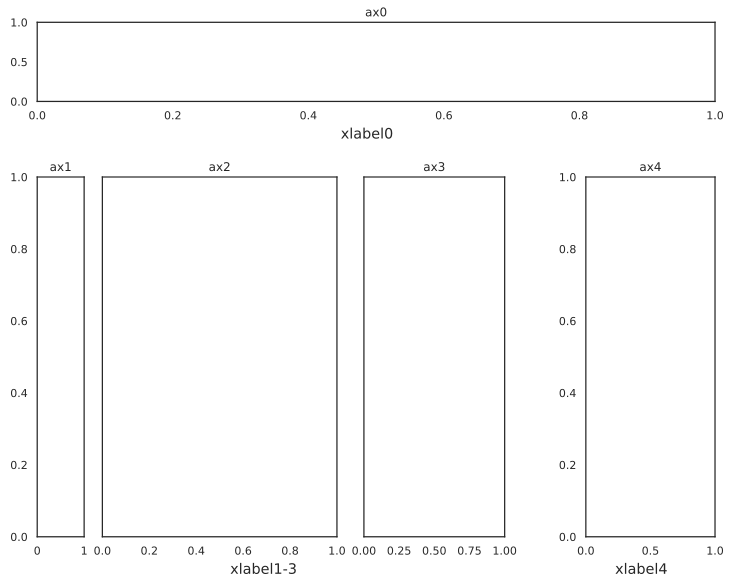

In [234]:
fig = plt.figure(constrained_layout=True, figsize=(10, 8))

# create top/bottom subfigs
(subfig_t, subfig_b) = fig.subfigures(2, 1, hspace=0.05, height_ratios=[1, 3])

# put ax0 in top subfig
ax0 = subfig_t.subplots()
ax0.set_title('ax0')
subfig_t.supxlabel('xlabel0')

# create left/right subfigs nested in bottom subfig
(subfig_bl, subfig_br) = subfig_b.subfigures(1, 2, wspace=0.1, width_ratios=[3, 1])

# put ax1-ax3 in gridspec of bottom-left subfig
gs = subfig_bl.add_gridspec(nrows=1, ncols=9)
ax1 = subfig_bl.add_subplot(gs[0, :1])
ax2 = subfig_bl.add_subplot(gs[0, 1:6], sharey=ax1)
ax3 = subfig_bl.add_subplot(gs[0, 6:], sharey=ax1)
ax1.set_title('ax1')
ax2.set_title('ax2')
ax3.set_title('ax3')
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
subfig_bl.supxlabel('xlabel1-3')

# put ax4 in bottom-right subfig
ax4 = subfig_br.subplots()
ax4.set_title('ax4')
subfig_br.supxlabel('xlabel4')